# Final Project

- [Proposal Slides](https://docs.google.com/presentation/d/19HS_KwSPFKRd2zuvY_Q2bnih39fn7u_j0c6uu4J9InA/edit?usp=sharing)
- [Final Presentation Slides](https://docs.google.com/presentation/d/1QH_9zNjP7lD-iFtkO82yjAIwxXM8UX6hwKBRihCbTKE/edit?usp=sharing)
- [Dataset](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020?select=results.csv)
- [API](https://docs.fastf1.dev/core.html#api-reference)

## Setup

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import fastf1
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import fastf1
from scipy.stats import pearsonr
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Circuits

In [2]:
circuits = pd.read_csv('circuits.csv')
circuits[circuits.circuitId == 14]

circuitId circuitRef                          name location country  \
13         14      monza  Autodromo Nazionale di Monza    Monza   Italy   

        lat      lng  alt                                                url  
13  45.6156  9.28111  162  http://en.wikipedia.org/wiki/Autodromo_Naziona...

## Races

In [3]:
races = pd.read_csv('races.csv')
races

raceId  year  round  circuitId                      name        date  \
0          1  2009      1          1     Australian Grand Prix  2009-03-29   
1          2  2009      2          2      Malaysian Grand Prix  2009-04-05   
2          3  2009      3         17        Chinese Grand Prix  2009-04-19   
3          4  2009      4          3        Bahrain Grand Prix  2009-04-26   
4          5  2009      5          4        Spanish Grand Prix  2009-05-10   
...      ...   ...    ...        ...                       ...         ...   
1096    1116  2023     18         69  United States Grand Prix  2023-10-22   
1097    1117  2023     19         32    Mexico City Grand Prix  2023-10-29   
1098    1118  2023     20         18      São Paulo Grand Prix  2023-11-05   
1099    1119  2023     21         80      Las Vegas Grand Prix  2023-11-19   
1100    1120  2023     22         24      Abu Dhabi Grand Prix  2023-11-26   

          time                                                url    fp1_date  \
0     06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...          \N   
1     09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...          \N   
2     07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...          \N   
3     12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...          \N   
4     12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...          \N   
...        ...                                                ...         ...   
1096  19:00:00  https://en.wikipedia.org/wiki/2023_United_Stat...  2023-10-20   
1097  20:00:00  https://en.wikipedia.org/wiki/2023_Mexico_City...  2023-10-27   
1098  17:00:00  https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...  2023-11-03   
1099  06:00:00  https://en.wikipedia.org/wiki/2023_Las_Vegas_G...  2023-11-17   
1100  13:00:00  https://en.wikipedia.org/wiki/2023_Abu_Dhabi_G...  2023-11-24   

      fp1_time    fp2_date  fp2_time    fp3_date  fp3_time  quali_date  \
0           \N          \N        \N          \N        \N          \N   
1           \N          \N        \N          \N        \N          \N   
2           \N          \N        \N          \N        \N          \N   
3           \N          \N        \N          \N        \N          \N   
4           \N          \N        \N          \N        \N          \N   
...        ...         ...       ...         ...       ...         ...   
1096  17:30:00  2023-10-21  18:00:00          \N        \N  2023-10-20   
1097  18:30:00  2023-10-27  22:00:00  2023-10-28  17:30:00  2023-10-28   
1098  14:30:00  2023-11-04  14:30:00          \N        \N  2023-11-03   
1099  04:30:00  2023-11-17  08:00:00  2023-11-18  04:30:00  2023-11-18   
1100  09:30:00  2023-11-24  13:00:00  2023-11-25  10:30:00  2023-11-25   

     quali_time sprint_date sprint_time  
0            \N          \N          \N  
1            \N          \N          \N  
2            \N          \N          \N  
3            \N          \N          \N  
4            \N          \N          \N  
...         ...         ...         ...  
1096   21:00:00  2023-10-21    22:00:00  
1097   21:00:00          \N          \N  
1098   18:00:00  2023-11-04    18:30:00  
1099   08:00:00          \N          \N  
1100   14:00:00          \N          \N  

[1101 rows x 18 columns]

<Axes: xlabel='circuitId', ylabel='year'>

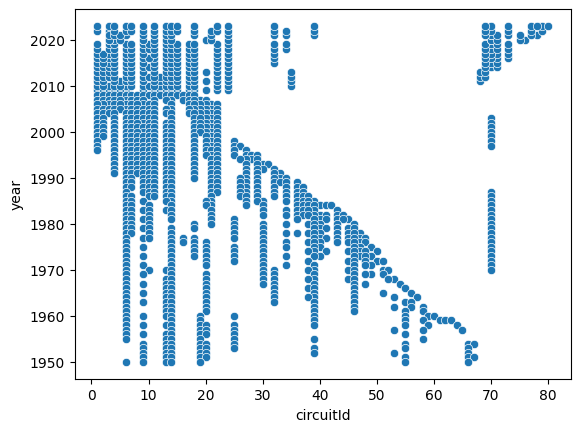

In [4]:
sns.scatterplot(x='circuitId', y='year', data=races)

In [5]:
raceTotals = races.groupby('circuitId').agg({'raceId': 'count', 'year': 'max'}).reset_index()
raceTotals = raceTotals[raceTotals.year == 2023].reset_index(drop=True).sort_values('raceId', ascending=False)
raceTotals

circuitId  raceId  year
8          14      73  2023
3           6      69  2023
5           9      58  2023
7          13      56  2023
4           7      42  2023
10         18      40  2023
6          11      38  2023
16         70      37  2023
11         22      33  2023
14         39      33  2023
2           4      33  2023
0           1      26  2023
13         32      23  2023
1           3      20  2023
12         24      15  2023
9          15      14  2023
15         69      11  2023
17         73       7  2023
18         77       3  2023
19         78       2  2023
20         79       2  2023
21         80       1  2023

<Axes: xlabel='circuitId', ylabel='year'>

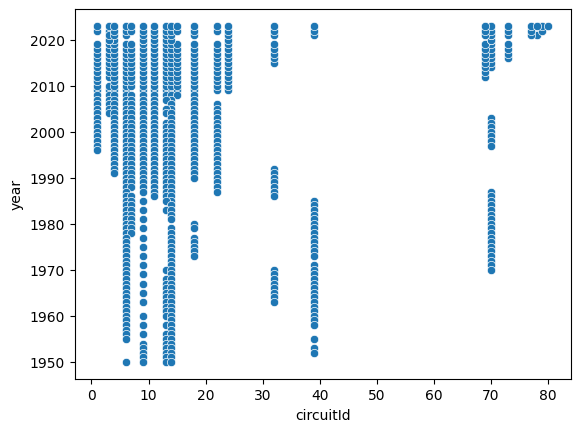

In [6]:
recentRaces = races[races.circuitId.isin(raceTotals.circuitId)].reset_index(drop=True)
sns.scatterplot(x='circuitId', y='year', data=recentRaces)

In [7]:
circuitsToKeep = recentRaces[recentRaces.year == 2009]
recentRaces = races[races.circuitId.isin(circuitsToKeep.circuitId)].reset_index(drop=True)
commonNames = recentRaces.groupby('circuitId')['name'].agg(lambda x: x.mode().iloc[0]).reset_index()
commonNames.columns = ['circuitId', 'common_name']
recentRaces = pd.merge(recentRaces, commonNames, on='circuitId', how='left')
display(recentRaces)
display(recentRaces.common_name.unique())
display(raceTotals[raceTotals.circuitId.isin(recentRaces.circuitId)])

raceId  year  round  circuitId                   name        date  \
0         1  2009      1          1  Australian Grand Prix  2009-03-29   
1         4  2009      4          3     Bahrain Grand Prix  2009-04-26   
2         5  2009      5          4     Spanish Grand Prix  2009-05-10   
3         6  2009      6          6      Monaco Grand Prix  2009-05-24   
4         8  2009      8          9     British Grand Prix  2009-06-21   
..      ...   ...    ...        ...                    ...         ...   
470    1112  2023     14         14     Italian Grand Prix  2023-09-03   
471    1113  2023     15         15   Singapore Grand Prix  2023-09-17   
472    1114  2023     16         22    Japanese Grand Prix  2023-09-24   
473    1118  2023     20         18   São Paulo Grand Prix  2023-11-05   
474    1120  2023     22         24   Abu Dhabi Grand Prix  2023-11-26   

         time                                                url    fp1_date  \
0    06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...          \N   
1    12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...          \N   
2    12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...          \N   
3    12:00:00  http://en.wikipedia.org/wiki/2009_Monaco_Grand...          \N   
4    12:00:00  http://en.wikipedia.org/wiki/2009_British_Gran...          \N   
..        ...                                                ...         ...   
470  13:00:00  https://en.wikipedia.org/wiki/2023_Italian_Gra...  2023-09-01   
471  12:00:00  https://en.wikipedia.org/wiki/2023_Singapore_G...  2023-09-15   
472  05:00:00  https://en.wikipedia.org/wiki/2023_Japanese_Gr...  2023-09-22   
473  17:00:00  https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...  2023-11-03   
474  13:00:00  https://en.wikipedia.org/wiki/2023_Abu_Dhabi_G...  2023-11-24   

     fp1_time    fp2_date  fp2_time    fp3_date  fp3_time  quali_date  \
0          \N          \N        \N          \N        \N          \N   
1          \N          \N        \N          \N        \N          \N   
2          \N          \N        \N          \N        \N          \N   
3          \N          \N        \N          \N        \N          \N   
4          \N          \N        \N          \N        \N          \N   
..        ...         ...       ...         ...       ...         ...   
470  11:30:00  2023-09-01  15:00:00  2023-09-02  10:30:00  2023-09-02   
471  09:30:00  2023-09-15  13:00:00  2023-09-16  09:30:00  2023-09-16   
472  02:30:00  2023-09-22  06:00:00  2023-09-23  02:30:00  2023-09-23   
473  14:30:00  2023-11-04  14:30:00          \N        \N  2023-11-03   
474  09:30:00  2023-11-24  13:00:00  2023-11-25  10:30:00  2023-11-25   

    quali_time sprint_date sprint_time            common_name  
0           \N          \N          \N  Australian Grand Prix  
1           \N          \N          \N     Bahrain Grand Prix  
2           \N          \N          \N     Spanish Grand Prix  
3           \N          \N          \N      Monaco Grand Prix  
4           \N          \N          \N     British Grand Prix  
..         ...         ...         ...                    ...  
470   14:00:00          \N          \N     Italian Grand Prix  
471   13:00:00          \N          \N   Singapore Grand Prix  
472   06:00:00          \N          \N    Japanese Grand Prix  
473   18:00:00  2023-11-04    18:30:00   Brazilian Grand Prix  
474   14:00:00          \N          \N   Abu Dhabi Grand Prix  

[475 rows x 19 columns]

array(['Australian Grand Prix', 'Bahrain Grand Prix',
       'Spanish Grand Prix', 'Monaco Grand Prix', 'British Grand Prix',
       'Hungarian Grand Prix', 'Belgian Grand Prix', 'Italian Grand Prix',
       'Singapore Grand Prix', 'Japanese Grand Prix',
       'Brazilian Grand Prix', 'Abu Dhabi Grand Prix'], dtype=object)

circuitId  raceId  year
8          14      73  2023
3           6      69  2023
5           9      58  2023
7          13      56  2023
10         18      40  2023
6          11      38  2023
11         22      33  2023
2           4      33  2023
0           1      26  2023
1           3      20  2023
12         24      15  2023
9          15      14  2023

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Australian Grand Prix'),
  Text(1, 0, 'Bahrain Grand Prix'),
  Text(2, 0, 'Spanish Grand Prix'),
  Text(3, 0, 'Monaco Grand Prix'),
  Text(4, 0, 'British Grand Prix'),
  Text(5, 0, 'Hungarian Grand Prix'),
  Text(6, 0, 'Belgian Grand Prix'),
  Text(7, 0, 'Italian Grand Prix'),
  Text(8, 0, 'Singapore Grand Prix'),
  Text(9, 0, 'Japanese Grand Prix'),
  Text(10, 0, 'Brazilian Grand Prix'),
  Text(11, 0, 'Abu Dhabi Grand Prix')])

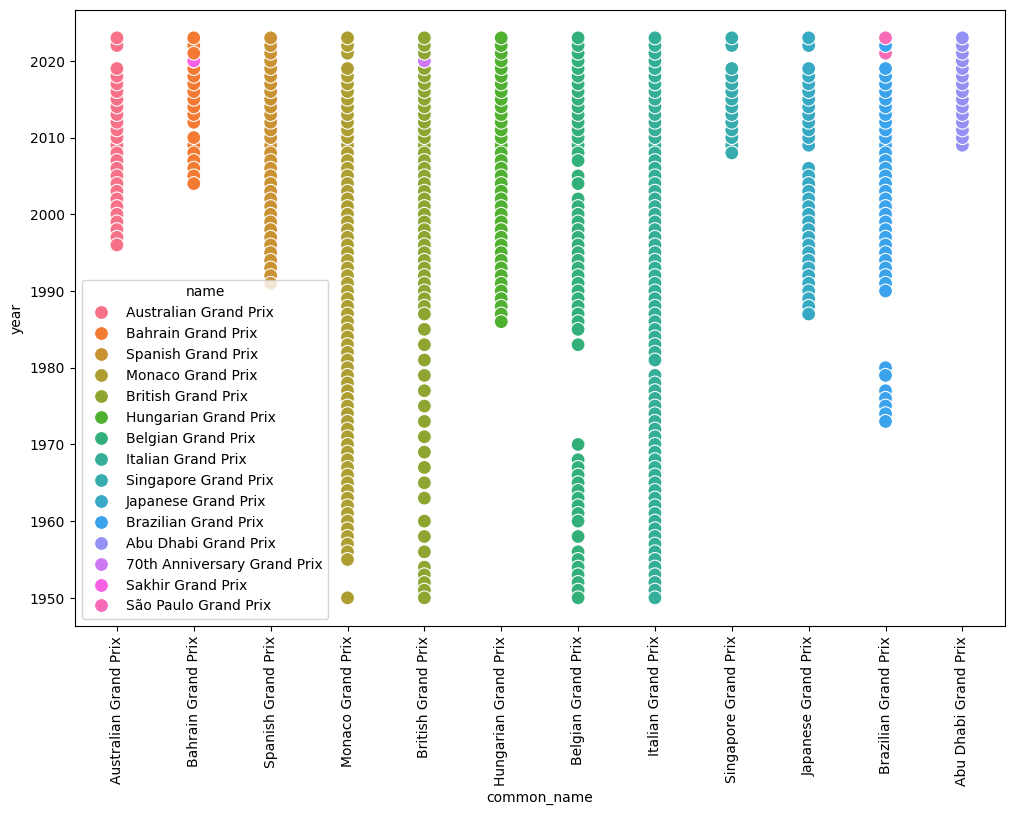

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='common_name', y='year', data=recentRaces, hue='name', s=100)
plt.xticks(rotation=90)

In [9]:
recentRaces = pd.merge(recentRaces, circuits, on='circuitId', how='left')
recentRaces = recentRaces.rename(columns={'name_x': 'race_name', 'url_x': 'race_url', 'common_name': 'common_race_name', 'name_y': 'circuit_name', 'url_y': 'circuit_url'})
recentRaces

raceId  year  round  circuitId              race_name        date  \
0         1  2009      1          1  Australian Grand Prix  2009-03-29   
1         4  2009      4          3     Bahrain Grand Prix  2009-04-26   
2         5  2009      5          4     Spanish Grand Prix  2009-05-10   
3         6  2009      6          6      Monaco Grand Prix  2009-05-24   
4         8  2009      8          9     British Grand Prix  2009-06-21   
..      ...   ...    ...        ...                    ...         ...   
470    1112  2023     14         14     Italian Grand Prix  2023-09-03   
471    1113  2023     15         15   Singapore Grand Prix  2023-09-17   
472    1114  2023     16         22    Japanese Grand Prix  2023-09-24   
473    1118  2023     20         18   São Paulo Grand Prix  2023-11-05   
474    1120  2023     22         24   Abu Dhabi Grand Prix  2023-11-26   

         time                                           race_url    fp1_date  \
0    06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...          \N   
1    12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...          \N   
2    12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...          \N   
3    12:00:00  http://en.wikipedia.org/wiki/2009_Monaco_Grand...          \N   
4    12:00:00  http://en.wikipedia.org/wiki/2009_British_Gran...          \N   
..        ...                                                ...         ...   
470  13:00:00  https://en.wikipedia.org/wiki/2023_Italian_Gra...  2023-09-01   
471  12:00:00  https://en.wikipedia.org/wiki/2023_Singapore_G...  2023-09-15   
472  05:00:00  https://en.wikipedia.org/wiki/2023_Japanese_Gr...  2023-09-22   
473  17:00:00  https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...  2023-11-03   
474  13:00:00  https://en.wikipedia.org/wiki/2023_Abu_Dhabi_G...  2023-11-24   

     fp1_time  ... sprint_time       common_race_name   circuitRef  \
0          \N  ...          \N  Australian Grand Prix  albert_park   
1          \N  ...          \N     Bahrain Grand Prix      bahrain   
2          \N  ...          \N     Spanish Grand Prix    catalunya   
3          \N  ...          \N      Monaco Grand Prix       monaco   
4          \N  ...          \N     British Grand Prix  silverstone   
..        ...  ...         ...                    ...          ...   
470  11:30:00  ...          \N     Italian Grand Prix        monza   
471  09:30:00  ...          \N   Singapore Grand Prix   marina_bay   
472  02:30:00  ...          \N    Japanese Grand Prix       suzuka   
473  14:30:00  ...    18:30:00   Brazilian Grand Prix   interlagos   
474  09:30:00  ...          \N   Abu Dhabi Grand Prix   yas_marina   

                       circuit_name     location    country      lat  \
0    Albert Park Grand Prix Circuit    Melbourne  Australia -37.8497   
1     Bahrain International Circuit       Sakhir    Bahrain  26.0325   
2    Circuit de Barcelona-Catalunya     Montmeló      Spain  41.5700   
3                 Circuit de Monaco  Monte-Carlo     Monaco  43.7347   
4               Silverstone Circuit  Silverstone         UK  52.0786   
..                              ...          ...        ...      ...   
470    Autodromo Nazionale di Monza        Monza      Italy  45.6156   
471       Marina Bay Street Circuit   Marina Bay  Singapore   1.2914   
472                  Suzuka Circuit       Suzuka      Japan  34.8431   
473      Autódromo José Carlos Pace    São Paulo     Brazil -23.7036   
474              Yas Marina Circuit    Abu Dhabi        UAE  24.4672   

           lng  alt                                        circuit_url  
0    144.96800   10  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1     50.51060    7  http://en.wikipedia.org/wiki/Bahrain_Internati...  
2      2.26111  109  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
3      7.42056    7     http://en.wikipedia.org/wiki/Circuit_de_Monaco  
4     -1.01694  153   http://en.wikipedia.org/wiki/Silverstone_Circuit  
..         

## Constructor Results

In [10]:
constructor_results = pd.read_csv('constructor_results.csv')
constructor_results = pd.merge(constructor_results, races[['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time']], how='left')
constructor_results

constructorResultsId  raceId  constructorId  points status  year  \
0                         1      18              1    14.0     \N  2008   
1                         2      18              2     8.0     \N  2008   
2                         3      18              3     9.0     \N  2008   
3                         4      18              4     5.0     \N  2008   
4                         5      18              5     2.0     \N  2008   
...                     ...     ...            ...     ...    ...   ...   
12285                 16785    1110            214    10.0     \N  2023   
12286                 16786    1110            213     1.0     \N  2023   
12287                 16787    1110             51     0.0     \N  2023   
12288                 16788    1110              3     0.0     \N  2023   
12289                 16789    1110            210     0.0     \N  2023   

       round  circuitId                   name        date      time  
0          1          1  Australian Grand Prix  2008-03-16  04:30:00  
1          1          1  Australian Grand Prix  2008-03-16  04:30:00  
2          1          1  Australian Grand Prix  2008-03-16  04:30:00  
3          1          1  Australian Grand Prix  2008-03-16  04:30:00  
4          1          1  Australian Grand Prix  2008-03-16  04:30:00  
...      ...        ...                    ...         ...       ...  
12285     12         13     Belgian Grand Prix  2023-07-30  13:00:00  
12286     12         13     Belgian Grand Prix  2023-07-30  13:00:00  
12287     12         13     Belgian Grand Prix  2023-07-30  13:00:00  
12288     12         13     Belgian Grand Prix  2023-07-30  13:00:00  
12289     12         13     Belgian Grand Prix  2023-07-30  13:00:00  

[12290 rows x 11 columns]

## Constructor Standings

In [11]:
constructor_standings = pd.read_csv('constructor_standings.csv')
display(constructor_standings)
constructor_standings.groupby('raceId').agg({'constructorId': 'count', 'wins': 'sum'})
# constructor_standings[constructor_standings.constructorId == 1].wins.tolist()

constructorStandingsId  raceId  constructorId  points  position  \
0                           1      18              1    14.0         1   
1                           2      18              2     8.0         3   
2                           3      18              3     9.0         2   
3                           4      18              4     5.0         4   
4                           5      18              5     2.0         5   
...                       ...     ...            ...     ...       ...   
13046                   28568    1110            214    57.0         6   
13047                   28569    1110              3    11.0         7   
13048                   28570    1110            213     3.0        10   
13049                   28571    1110            210    11.0         8   
13050                   28572    1110              1   103.0         5   

      positionText  wins  
0                1     1  
1                3     0  
2                2     0  
3                4     0  
4                5     0  
...            ...   ...  
13046            6     0  
13047            7     0  
13048           10     0  
13049            8     0  
13050            5     0  

[13051 rows x 7 columns]

constructorId  wins
raceId                     
1                   9     1
2                  10     2
3                  10     3
4                  10     4
5                  10     5
...               ...   ...
1106               10     8
1107               10     9
1108               10    10
1109               10    11
1110               10    12

[1027 rows x 2 columns]

In [12]:
circuit_id = [1,3,4,6,9,11,13,14,15,18,22,24]

results = pd.read_csv('results.csv')

all_circuits = races.loc[races['circuitId'].isin(circuit_id)]
all_circuits = all_circuits[all_circuits.year >= 2008]
all_circuits.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

all_circuits =  pd.merge(all_circuits, results, on='raceId')

all_circuits = all_circuits[all_circuits.fastestLapSpeed != '\\N']
all_circuits['fastestLapSpeed'] = all_circuits['fastestLapSpeed'].astype(str).astype(float).astype(int)

# display(all_circuits.dtypes)

# sns.scatterplot(x='fastestLapSpeed', y='year', hue='circuitId', legend='full', data=all_circuits)



In [13]:
#sns.scatterplot(x='fastestLapSpeed', y='year', data=all_circuits)

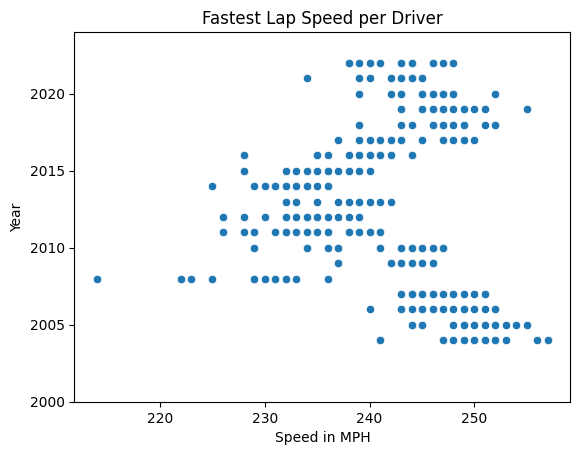

In [14]:
results = pd.read_csv('results.csv')
lap_times = pd.read_csv('lap_times.csv')

italian_circuit = races.loc[races['circuitId'] == 14]
italian_circuit = italian_circuit[italian_circuit.year >= 2000]

italian_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)


italian_circuit =  pd.merge(italian_circuit, results, on='raceId')


italian_circuit = italian_circuit[italian_circuit.fastestLapSpeed != '\\N']


italian_circuit['fastestLapSpeed'] = italian_circuit['fastestLapSpeed'].astype(str).astype(float).astype(int)
italian_circuit['fastestLapTime'] = italian_circuit['fastestLapTime'].astype(str)



sns.scatterplot(x='fastestLapSpeed', y='year', data=italian_circuit)

def lap_time_to_seconds(lap_time_str):
    minutes, seconds = map(float, lap_time_str.split(':'))
    return minutes * 60 + seconds

# Apply the function to the 'lap_time' column
italian_circuit['seconds'] = italian_circuit['fastestLapTime'].apply(lap_time_to_seconds)
plt.title('Fastest Lap Speed per Driver')
plt.xlabel('Speed in MPH')
plt.ylabel('Year')
plt.ylim((2000,2024))


plt.show()


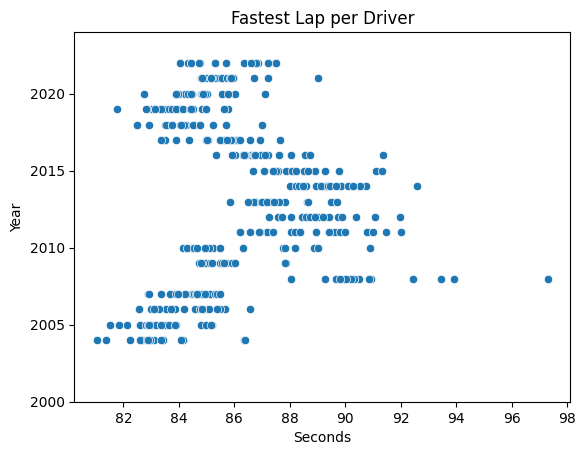

In [15]:
sns.scatterplot(x='seconds', y='year', data=italian_circuit)

plt.title('Fastest Lap per Driver')
plt.xlabel('Seconds')
plt.ylabel('Year')
plt.ylim((2000,2024))

plt.show()

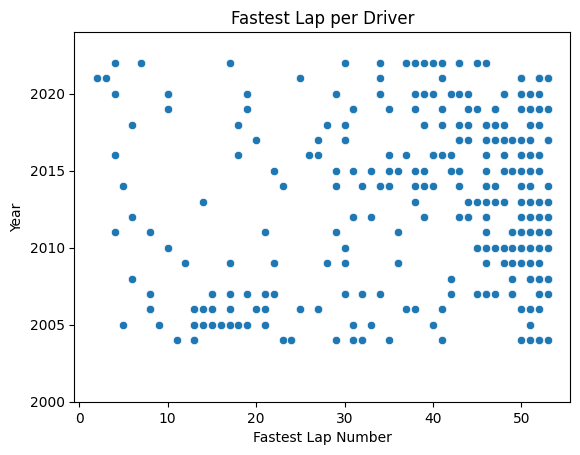

In [16]:
italian_circuit['fastestLap'] = italian_circuit['fastestLap'].astype(str).astype(int)

sns.scatterplot(x='fastestLap', y='year', data=italian_circuit)
plt.ylim((2000,2024))
plt.title('Fastest Lap per Driver')
plt.xlabel('Fastest Lap Number')
plt.ylabel('Year')

plt.show()

In [17]:
# create a list of our conditions
conditions = [
    (italian_circuit['fastestLap'] > 0) & (italian_circuit['fastestLap'] <= 20),
    (italian_circuit['fastestLap'] > 20) & (italian_circuit['fastestLap'] <= 40),
    (italian_circuit['fastestLap'] > 40) & (italian_circuit['fastestLap'] <= 60),]

# create a list of the values we want to assign for each condition
values = [1, 2, 3]

# create a new column and use np.select to assign values to it using our lists as arguments
italian_circuit['group'] = np.select(conditions, values)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

from sklearn.naive_bayes import GaussianNB

# Use Gaussian for datasets with quantitative variables
clf = GaussianNB()


X_train, X_test, y_train, y_test = train_test_split(italian_circuit[['year', 'round', 'driverId', 'constructorId', 'grid', 'laps', 'rank', 'positionOrder', ]].values, italian_circuit.group,
                                                    test_size=.75)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred, labels=[1,2,3])
print(p, r, f, s)

[0.75       0.44       0.69834711] [0.41860465 0.15942029 0.94413408] [0.53731343 0.23404255 0.80285036] [ 43  69 179]


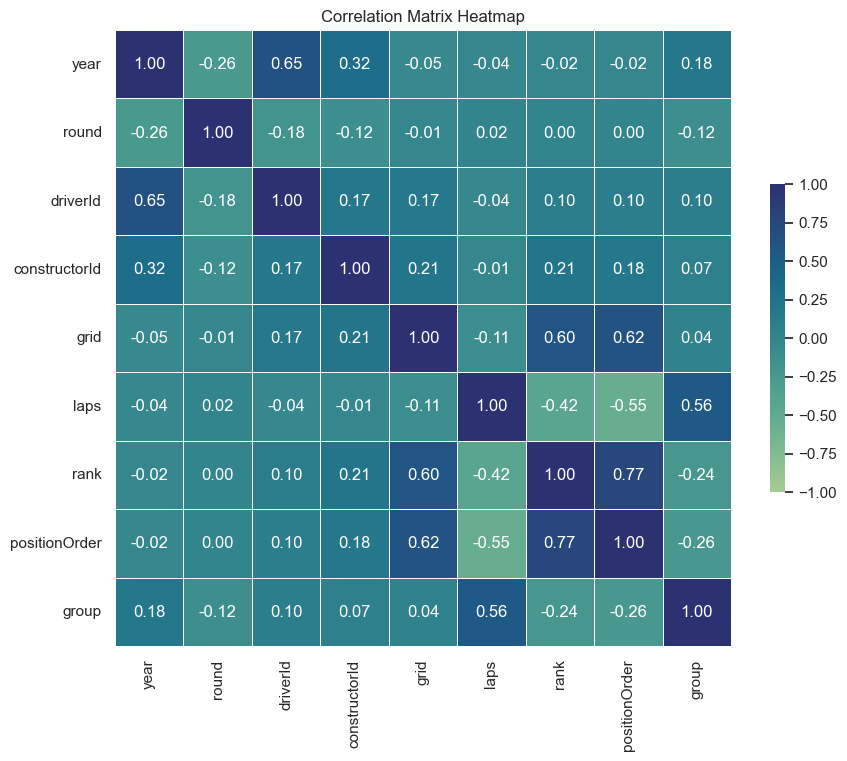

In [19]:
# Heatmap of the correlation matrix
correlation_matrix = italian_circuit[['year', 'round', 'driverId', 'constructorId', 'grid', 'laps', 'rank', 'positionOrder', 'group']].corr()

sns.set_theme(style="white")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='crest', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [20]:
australian_circuit = races.loc[races['circuitId'] == 1]
australian_circuit = australian_circuit[australian_circuit.year >= 2008]
australian_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

lap_times = pd.read_csv('lap_times.csv')
qualifying = pd.read_csv('qualifying.csv')
results = pd.read_csv('results.csv')

results.drop([ 'statusId', 'points', 'laps',], axis=1,  inplace=True)


merger = ['raceId', 'driverId']
merger2 = ['raceId', 'driverId', 'constructorId']

australian_circuit =  pd.merge(australian_circuit, lap_times, on='raceId')


merged_australian_circuit = pd.merge(australian_circuit, qualifying, on=merger)
merged_australian_circuit.drop(['date', 'name', 'round',  'time_x'], axis=1,  inplace=True)


merged_australian_circuit = pd.merge(merged_australian_circuit, results, on= merger2)





In [21]:
bahrain_circuit = races.loc[races['circuitId'] == 3]
bahrain_circuit = bahrain_circuit[bahrain_circuit.year >= 2008]
bahrain_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)


merger = ['raceId', 'driverId']


bahrain_circuit =  pd.merge(bahrain_circuit, lap_times, on='raceId')

merged_bahrain_circuit = pd.merge(bahrain_circuit, qualifying, on=merger)


In [22]:
spanish_circuit = races.loc[races['circuitId'] == 4]
spanish_circuit = spanish_circuit[spanish_circuit.year >= 2008]
spanish_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merger = ['raceId', 'driverId']

spanish_circuit =  pd.merge(spanish_circuit, lap_times, on='raceId')

merged_spanish_circuit = pd.merge(spanish_circuit, qualifying, on=merger)


In [23]:
monaco_circuit = races.loc[races['circuitId'] == 6]
monaco_circuit = monaco_circuit[monaco_circuit.year >= 2008]
monaco_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merger = ['raceId', 'driverId']

monaco_circuit =  pd.merge(monaco_circuit, lap_times, on='raceId')

merged_monaco_circuit = pd.merge(monaco_circuit, qualifying, on=merger)



In [24]:
british_circuit = races.loc[races['circuitId'] == 9]
british_circuit = british_circuit[british_circuit.year >= 2008]
british_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merger = ['raceId', 'driverId']

british_circuit =  pd.merge(british_circuit, lap_times, on='raceId')

merged_british_circuit = pd.merge(british_circuit, qualifying, on=merger)



In [25]:
hungarian_circuit = races.loc[races['circuitId'] == 11]
hungarian_circuit = hungarian_circuit[hungarian_circuit.year >= 2008]
hungarian_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)


merger = ['raceId', 'driverId']

hungarian_circuit =  pd.merge(hungarian_circuit, lap_times, on='raceId')

merged_hungarian_circuit = pd.merge(hungarian_circuit, qualifying, on=merger)


In [26]:
belgian_circuit = races.loc[races['circuitId'] == 13]
belgian_circuit = belgian_circuit[belgian_circuit.year >= 2008]
belgian_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merger = ['raceId', 'driverId']

belgian_circuit =  pd.merge(belgian_circuit, lap_times, on='raceId')

merged_belgian_circuit = pd.merge(belgian_circuit, qualifying, on=merger)


In [27]:
italian_circuit = races.loc[races['circuitId'] == 14]
italian_circuit = italian_circuit[italian_circuit.year >= 2008]
italian_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merger = ['raceId', 'driverId']

italian_circuit =  pd.merge(italian_circuit, lap_times, on='raceId')

merged_italian_circuit = pd.merge(italian_circuit, qualifying, on=merger)

In [28]:
singapore_circuit = races.loc[races['circuitId'] == 15]
singapore_circuit = singapore_circuit[singapore_circuit.year >= 2008]
singapore_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merger = ['raceId', 'driverId']

singapore_circuit =  pd.merge(singapore_circuit, lap_times, on='raceId')

merged_singapore_circuit = pd.merge(singapore_circuit, qualifying, on=merger)


In [29]:
sao_paulo_circuit = races.loc[races['circuitId'] == 18]
sao_paulo_circuit = sao_paulo_circuit[sao_paulo_circuit.year >= 2008]
sao_paulo_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merger = ['raceId', 'driverId']

sao_paulo_circuit =  pd.merge(sao_paulo_circuit, lap_times, on='raceId')

merged_sao_paulo_circuit = pd.merge(sao_paulo_circuit, qualifying, on=merger)


In [30]:
japanese_circuit = races.loc[races['circuitId'] == 22]
japanese_circuit = japanese_circuit[japanese_circuit.year >= 2008]
japanese_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merger = ['raceId', 'driverId']

japanese_circuit =  pd.merge(japanese_circuit, lap_times, on='raceId')

merged_japanese_circuit = pd.merge(japanese_circuit, qualifying, on=merger)


In [31]:
abu_dhabi_circuit = races.loc[races['circuitId'] == 24]
abu_dhabi_circuit = abu_dhabi_circuit[abu_dhabi_circuit.year >= 2008]
abu_dhabi_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merger = ['raceId', 'driverId']

abu_dhabi_circuit =  pd.merge(abu_dhabi_circuit, lap_times, on='raceId')

merged_abu_dhabi_circuit = pd.merge(abu_dhabi_circuit, qualifying, on=merger)


## Exploring/Cleaning Data

In [32]:
# session = fastf1.get_session(2022, 'Australia', 'race')
# session.load()
# display(session.name)
# display(session.date)
# display(session.session_info)
# display(session.drivers)
# display(session.results)
# display(session.laps)
# display(session.total_laps)
# display(session.weather_data)
# display(session.car_data)
# display(session.pos_data)
# display(session.session_start_time)
# display(session.t0_date)

In [33]:
# races = pd.read_csv('races.csv')
# italianRaceID = races[races.name == 'Italian Grand Prix'][races.year == 2023].raceId.tolist()[0]
# italianRaceID
# results = pd.read_csv('results.csv')
# italianRace = results[results.raceId == italianRaceID]
# italianRace

### Fetching data on the 2023 Italian Grand Prix race

In [34]:
session = fastf1.get_session(2023, 'Monza', 'race')
session.load()
lapsOriginal = session.laps

req         WARNING 	DEFAULT CACHE ENABLED! (197.62 MB) C:\Users\nated\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Italian Grand Prix - Race [v3.3.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '44', '23', '4', '14', '77', '40', '81', '2', '24', 

In [35]:
qualifyingSession = fastf1.get_session(2023, 'Monza', 'Q')
qualifyingSession.load()
qualifyingResults = qualifyingSession.results

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.3.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '1', '16', '63', '11', '23', '81', '44', '4', '14', '22', '40', '27', '77', '2', '24', '10', '31', '20', '18']


In [36]:
qualifyingResults.columns

Index(['DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName',
       'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName',
       'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition',
       'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points'],
      dtype='object')

In [37]:
results = session.results
topTime = results[results.Position == 1].Time.tolist()[0]
results['TotalTime'] = topTime + results['Time']
results.loc[results.Position == 1, 'TotalTime'] = results.Time
results

DriverNumber BroadcastName Abbreviation         DriverId         TeamName  \
1             1  M VERSTAPPEN          VER   max_verstappen  Red Bull Racing   
11           11       S PEREZ          PER            perez  Red Bull Racing   
55           55       C SAINZ          SAI            sainz          Ferrari   
16           16     C LECLERC          LEC          leclerc          Ferrari   
63           63     G RUSSELL          RUS          russell         Mercedes   
44           44    L HAMILTON          HAM         hamilton         Mercedes   
23           23       A ALBON          ALB            albon         Williams   
4             4      L NORRIS          NOR           norris          McLaren   
14           14      F ALONSO          ALO           alonso     Aston Martin   
77           77      V BOTTAS          BOT           bottas       Alfa Romeo   
40           40      L LAWSON          LAW           lawson       AlphaTauri   
81           81     O PIASTRI          PIA          piastri          McLaren   
2             2    L SARGEANT          SAR         sargeant         Williams   
24           24        G ZHOU          ZHO             zhou       Alfa Romeo   
10           10       P GASLY          GAS            gasly           Alpine   
18           18      L STROLL          STR           stroll     Aston Martin   
27           27  N HULKENBERG          HUL       hulkenberg     Haas F1 Team   
20           20   K MAGNUSSEN          MAG  kevin_magnussen     Haas F1 Team   
31           31        E OCON          OCO             ocon           Alpine   
22           22     Y TSUNODA          TSU          tsunoda       AlphaTauri   

   TeamColor        TeamId  FirstName    LastName         FullName  ...  \
1     3671C6      red_bull        Max  Verstappen   Max Verstappen  ...   
11    3671C6      red_bull     Sergio       Perez     Sergio Perez  ...   
55    F91536       ferrari     Carlos       Sainz     Carlos Sainz  ...   
16    F91536       ferrari    Charles     Leclerc  Charles Leclerc  ...   
63    6CD3BF      mercedes     George     Russell   George Russell  ...   
44    6CD3BF      mercedes      Lewis    Hamilton   Lewis Hamilton  ...   
23    37BEDD      williams  Alexander       Albon  Alexander Albon  ...   
4     F58020       mclaren      Lando      Norris     Lando Norris  ...   
14    358C75  aston_martin   Fernando      Alonso  Fernando Alonso  ...   
77    C92D4B          alfa   Valtteri      Bottas  Valtteri Bottas  ...   
40    5E8FAA    alphatauri       Liam      Lawson      Liam Lawson  ...   
81    F58020       mclaren      Oscar     Piastri    Oscar Piastri  ...   
2     37BEDD      williams      Logan    Sargeant   Logan Sargeant  ...   
24    C92D4B          alfa     Guanyu        Zhou      Guanyu Zhou  ...   
10    2293D1        alpine     Pierre       Gasly     Pierre Gasly  ...   
18    358C75  aston_martin      Lance      Stroll     Lance Stroll  ...   
27    B6BABD          haas       Nico  Hulkenberg  Nico Hulkenberg  ...   
20    B6BABD          haas      Kevin   Magnussen  Kevin Magnussen  ...   
31    2293D1        alpine    Esteban        Ocon     Esteban Ocon  ...   
22    5E8FAA    alphatauri       Yuki     Tsunoda     Yuki Tsunoda  ...   

   Position ClassifiedPosition  GridPosition  Q1  Q2  Q3  \
1       1.0                  1           2.0 NaT NaT NaT   
11      2.0                  2           5.0 NaT NaT NaT   
55      3.0                  3           1.0 NaT NaT NaT   
16      4.0                  4           3.0 NaT NaT NaT   
63      5.0                  5           4.0 NaT NaT NaT   
44      6.0                  6           8.0 NaT NaT NaT   
23      7.0                  7           6.0 NaT NaT NaT   
4       8.0                  8           9.0 NaT NaT NaT   
14      9.0                  9          10.0 NaT NaT NaT   
77     10.0                 10          14.0 NaT NaT NaT   
40     11.0                 11          12.0 NaT NaT NaT   
81     12.0               

In [38]:
results[['Abbreviation', 'Position', 'ClassifiedPosition', 'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'TotalTime', 'Status']]

Abbreviation  Position ClassifiedPosition  GridPosition  Q1  Q2  Q3  \
1           VER       1.0                  1           2.0 NaT NaT NaT   
11          PER       2.0                  2           5.0 NaT NaT NaT   
55          SAI       3.0                  3           1.0 NaT NaT NaT   
16          LEC       4.0                  4           3.0 NaT NaT NaT   
63          RUS       5.0                  5           4.0 NaT NaT NaT   
44          HAM       6.0                  6           8.0 NaT NaT NaT   
23          ALB       7.0                  7           6.0 NaT NaT NaT   
4           NOR       8.0                  8           9.0 NaT NaT NaT   
14          ALO       9.0                  9          10.0 NaT NaT NaT   
77          BOT      10.0                 10          14.0 NaT NaT NaT   
40          LAW      11.0                 11          12.0 NaT NaT NaT   
81          PIA      12.0                 12           7.0 NaT NaT NaT   
2           SAR      13.0                 13          15.0 NaT NaT NaT   
24          ZHO      14.0                 14          16.0 NaT NaT NaT   
10          GAS      15.0                 15          17.0 NaT NaT NaT   
18          STR      16.0                 16          20.0 NaT NaT NaT   
27          HUL      17.0                 17          13.0 NaT NaT NaT   
20          MAG      18.0                 18          19.0 NaT NaT NaT   
31          OCO      19.0                  R          18.0 NaT NaT NaT   
22          TSU      20.0                  R          11.0 NaT NaT NaT   

                     Time              TotalTime    Status  
1  0 days 01:13:41.143000 0 days 01:13:41.143000  Finished  
11 0 days 00:00:06.064000 0 days 01:13:47.207000  Finished  
55 0 days 00:00:11.193000 0 days 01:13:52.336000  Finished  
16 0 days 00:00:11.377000 0 days 01:13:52.520000  Finished  
63 0 days 00:00:23.028000 0 days 01:14:04.171000  Finished  
44 0 days 00:00:42.679000 0 days 01:14:23.822000  Finished  
23 0 days 00:00:45.106000 0 days 01:14:26.249000  Finished  
4  0 days 00:00:45.449000 0 days 01:14:26.592000  Finished  
14 0 days 00:00:46.294000 0 days 01:14:27.437000  Finished  
77 0 days 00:01:04.056000 0 days 01:14:45.199000  Finished  
40 0 days 00:01:10.638000 0 days 01:14:51.781000  Finished  
81 0 days 00:01:13.074000 0 days 01:14:54.217000  Finished  
2  0 days 00:01:18.557000 0 days 01:14:59.700000  Finished  
24 0 days 00:01:20.164000 0 days 01:15:01.307000  Finished  
10 0 days 00:01:22.510000 0 days 01:15:03.653000  Finished  
18 0 days 00:01:27.266000 0 days 01:15:08.409000  Finished  
27                    NaT                    NaT    +1 Lap  
20                    NaT                    NaT    +1 Lap  
31                    NaT                    NaT  Steering  
22                    NaT                    NaT    Engine

### Cleaning, combining, and adding to the data

In [39]:
laps = lapsOriginal.copy()

# Extract seconds from lap times
laps['LapSeconds'] = (laps['LapTime'].dt.seconds * 1000000 + laps['LapTime'].dt.microseconds) / 1000000
# Get an accumulated time for each lap
lapStartTime = laps.iloc[0].LapStartDate
laps['LapStartTimeSeconds'] = laps.LapStartDate - lapStartTime
# Add driver-specific data
laps = pd.merge(laps, results[['Abbreviation', 'Position', 'GridPosition', 'TotalTime']], left_on='Driver', right_on='Abbreviation', how='left')
# Add qualifying data
laps = pd.merge(laps, qualifyingResults[['Abbreviation', 'Q1', 'Q2', 'Q3']], left_on='Driver', right_on='Abbreviation', how='left')
# Bin drivers into upper half of finishers and lower half
laps['UpperHalf'] = laps['Position_y'].apply(lambda x: True if x <= laps['Position_y'].max() / 2 else False)
# Calculate the number of pit stops for each driver
driverPitStops = laps.groupby('Driver')['PitInTime'].nunique().reset_index()
driverPitStops.columns = ['Driver', 'PitStops']
laps = pd.merge(laps, driverPitStops, on='Driver', how='left')
# Calculate mean and std of lap times for each driver
meanLapTimes = laps.groupby('Driver')['LapTime'].mean().reset_index()
meanLapTimes.columns = ['Driver', 'MeanLapTime']
stdLapTimes = laps.groupby('Driver')['LapTime'].std().reset_index()
stdLapTimes.columns = ['Driver', 'stdLapTime']
lapTimesStats = pd.merge(meanLapTimes, stdLapTimes, on='Driver', how='left')
laps = pd.merge(laps, lapTimesStats, on='Driver', how='left')

# Calculate pit stop durations/timing
for i in range(laps.PitStops.max()):
    laps[f'Stop{i+1}Time'] = pd.NaT
    laps[f'Stop{i+1}Lap'] = np.NaN
laps['avgStopTime'] = pd.NaT
laps['LongestStopTime'] = pd.NaT
laps

for driver in laps.Driver.unique():
    driverStats = laps[laps.Driver == driver].reset_index()
    pitIn = driverStats[driverStats.PitInTime.notna()].index
    pitOut = driverStats[driverStats.PitOutTime.notna()].index
    pitTimes = []
    for i in range(len(pitOut)):
        pitTime = driverStats.iloc[pitOut[i]].PitOutTime - driverStats.iloc[pitIn[i]].PitInTime
        pitTimes.append(pitTime)
        laps.loc[laps['Driver'] == driver, f'Stop{i+1}Time'] = pitTime
        laps.loc[laps['Driver'] == driver, f'Stop{i+1}Lap'] = driverStats.iloc[pitIn[i]].LapNumber
    if len(pitTimes) > 0:
        avgPitTime = pd.Timedelta(0)
        longestPitTime = pd.Timedelta(0)
        for time in pitTimes:
            avgPitTime += time
            if time > longestPitTime: 
                longestPitTime = time
        avgPitTime /= len(pitTimes)
        
        laps.loc[laps['Driver'] == driver, 'avgStopTime'] = avgPitTime
        laps.loc[laps['Driver'] == driver, 'LongestStopTime'] = longestPitTime

display(laps)
display(laps.columns)
laps.describe()

C:\Users\nated\AppData\Local\Temp\ipykernel_21888\3760470420.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0 days 00:00:24.281000' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  laps.loc[laps['Driver'] == driver, f'Stop{i+1}Time'] = pitTime
C:\Users\nated\AppData\Local\Temp\ipykernel_21888\3760470420.py:53: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0 days 00:00:24.281000' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  laps.loc[laps['Driver'] == driver, 'avgStopTime'] = avgPitTime
C:\Users\nated\AppData\Local\Temp\ipykernel_21888\3760470420.py:54: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0 days 00:00:24.281000' has dtype incompatible with datetime64[ns], plea

Time Driver DriverNumber                LapTime  \
0   0 days 01:23:49.801000    VER            1 0 days 00:01:27.905000   
1   0 days 01:25:15.964000    VER            1 0 days 00:01:26.163000   
2   0 days 01:26:41.666000    VER            1 0 days 00:01:25.702000   
3   0 days 01:28:07.716000    VER            1 0 days 00:01:26.050000   
4   0 days 01:29:33.892000    VER            1 0 days 00:01:26.176000   
..                     ...    ...          ...                    ...   
962 0 days 02:31:27.453000    PIA           81 0 days 00:01:26.614000   
963 0 days 02:32:53.520000    PIA           81 0 days 00:01:26.067000   
964 0 days 02:34:19.361000    PIA           81 0 days 00:01:25.841000   
965 0 days 02:35:44.954000    PIA           81 0 days 00:01:25.593000   
966 0 days 02:39:15.549000    PIA           81                    NaT   

     LapNumber  Stint PitOutTime PitInTime            Sector1Time  \
0          1.0    1.0        NaT       NaT                    NaT   
1          2.0    1.0        NaT       NaT 0 days 00:00:28.274000   
2          3.0    1.0        NaT       NaT 0 days 00:00:28.097000   
3          4.0    1.0        NaT       NaT 0 days 00:00:28.145000   
4          5.0    1.0        NaT       NaT 0 days 00:00:28.155000   
..         ...    ...        ...       ...                    ...   
962       47.0    3.0        NaT       NaT 0 days 00:00:28.276000   
963       48.0    3.0        NaT       NaT 0 days 00:00:28.089000   
964       49.0    3.0        NaT       NaT 0 days 00:00:27.763000   
965       50.0    3.0        NaT       NaT 0 days 00:00:28.181000   
966       51.0    3.0        NaT       NaT                    NaT   

               Sector2Time  ... UpperHalf PitStops               MeanLapTime  \
0   0 days 00:00:29.666000  ...      True        1 0 days 00:01:26.689078431   
1   0 days 00:00:29.543000  ...      True        1 0 days 00:01:26.689078431   
2   0 days 00:00:29.320000  ...      True        1 0 days 00:01:26.689078431   
3   0 days 00:00:29.474000  ...      True        1 0 days 00:01:26.689078431   
4   0 days 00:00:29.514000  ...      True        1 0 days 00:01:26.689078431   
..                     ...  ...       ...      ...                       ...   
962 0 days 00:00:29.795000  ...     False        2    0 days 00:01:28.061160   
963 0 days 00:00:29.668000  ...     False        2    0 days 00:01:28.061160   
964 0 days 00:00:29.762000  ...     False        2    0 days 00:01:28.061160   
965 0 days 00:00:29.335000  ...     False        2    0 days 00:01:28.061160   
966                    NaT  ...     False        2    0 days 00:01:28.061160   

                   stdLapTime               Stop1Time  Stop1Lap  \
0   0 days 00:00:02.870592843  0 days 00:00:24.281000      20.0   
1   0 days 00:00:02.870592843  0 days 00:00:24.281000      20.0   
2   0 days 00:00:02.870592843  0 days 00:00:24.281000      20.0   
3   0 days 00:00:02.870592843  0 days 00:00:24.281000      20.0   
4   0 days 00:00:02.870592843  0 days 00:00:24.281000      20.0   
..                        ...                     ...       ...   
962 0 days 00:00:04.857096181  0 days 00:00:24.140000      23.0   
963 0 days 00:00:04.857096181  0 days 00:00:24.140000      23.0   
964 0 days 00:00:04.857096181  0 days 00:00:24.140000      23.0   
965 0 days 00:00:04.857096181  0 days 00:00:24.140000      23.0   
966 0 days 00:00:04.857096181  0 days 00:00:24.140000      23.0   

                  Stop2Time  Stop2Lap             avgStopTime  \
0                       NaN       NaN  0 days 00:00:24.281000   
1                       NaN       NaN  0 days 00:00:24.281000   
2                       NaN       NaN  0 days 00:00:24.281000   
3                       NaN       NaN  0 days 00:00:24.281000   
4                       NaN       NaN  0 days 00:00:24.281000   
..                      ...       ...                     ...   
962  0 days 00:00:31.797000      41.0  0 days 00:00:27.968500   
963  0 days 00:00:31.797000   

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position_x', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'LapSeconds', 'LapStartTimeSeconds',
       'Abbreviation_x', 'Position_y', 'GridPosition', 'TotalTime',
       'Abbreviation_y', 'Q1', 'Q2', 'Q3', 'UpperHalf', 'PitStops',
       'MeanLapTime', 'stdLapTime', 'Stop1Time', 'Stop1Lap', 'Stop2Time',
       'Stop2Lap', 'avgStopTime', 'LongestStopTime'],
      dtype='object')

Time                    LapTime   LapNumber  \
count                        967                        948  967.000000   
mean   0 days 02:00:29.264126163  0 days 00:01:27.766147679   25.974147   
min       0 days 01:23:49.013000     0 days 00:01:25.072000    1.000000   
25%       0 days 01:41:29.115500     0 days 00:01:26.463250   13.000000   
50%       0 days 02:00:35.264000     0 days 00:01:27.044000   26.000000   
75%       0 days 02:18:53.835000     0 days 00:01:27.518750   39.000000   
max       0 days 02:40:15.309000     0 days 00:01:53.593000   52.000000   
std    0 days 00:21:43.269455167  0 days 00:00:03.598416700   14.812575   

            Stint                 PitOutTime                  PitInTime  \
count  967.000000                         25                         26   
mean     1.736298     0 days 01:55:36.463640     0 days 01:56:09.235000   
min      1.000000     0 days 01:37:34.372000     0 days 01:37:06.997000   
25%      1.000000     0 days 01:44:37.492000     0 days 01:45:37.737750   
50%      2.000000     0 days 01:53:09.955000     0 days 01:52:54.541500   
75%      2.000000     0 days 02:02:09.621000     0 days 02:06:32.563500   
max      3.000000     0 days 02:22:52.576000     0 days 02:22:20.779000   
std      0.626994  0 days 00:12:43.457600916  0 days 00:13:23.479666184   

                     Sector1Time                Sector2Time  \
count                        929                        948   
mean   0 days 00:00:28.839644779  0 days 00:00:30.047214135   
min       0 days 00:00:27.731000     0 days 00:00:29.130000   
25%       0 days 00:00:28.148000     0 days 00:00:29.761500   
50%       0 days 00:00:28.261000     0 days 00:00:30.005500   
75%       0 days 00:00:28.412000     0 days 00:00:30.226500   
max       0 days 00:00:56.224000     0 days 00:00:32.732000   
std    0 days 00:00:03.371164983  0 days 00:00:00.452883617   

                     Sector3Time         Sector1SessionTime  ... GridPosition  \
count                        948                        928  ...   967.000000   
mean   0 days 00:00:28.819651898  0 days 01:59:34.552404094  ...    10.332989   
min       0 days 00:00:27.838000     0 days 01:24:17.279000  ...     1.000000   
25%       0 days 00:00:28.421000     0 days 01:41:43.683000  ...     5.000000   
50%       0 days 00:00:28.677500     0 days 01:59:40.655500  ...    10.000000   
75%       0 days 00:00:28.925250     0 days 02:17:22.906250  ...    16.000000   
max       0 days 00:00:47.837000     0 days 02:35:49.737000  ...    20.000000   
std    0 days 00:00:01.050402745  0 days 00:20:47.343383159  ...     5.890721   

                       TotalTime                         Q1  \
count                        825                        967   
mean   0 days 01:14:28.865903030  0 days 00:01:22.136373319   
min       0 days 01:13:41.143000     0 days 00:01:21.573000   
25%       0 days 01:13:52.520000     0 days 00:01:21.930000   
50%       0 days 01:14:26.592000     0 days 00:01:22.106000   
75%       0 days 01:14:54.217000     0 days 00:01:22.390000   
max       0 days 01:15:08.409000     0 days 00:01:22.860000   
std    0 days 00:00:29.090368624  0 days 00:00:00.325593762   

                              Q2                         Q3    PitStops  \
count                        724                        519  967.000000   
mean   0 days 00:01:21.443332872  0 days 00:01:20.708052023    1.355739   
min       0 days 00:01:20.937000     0 days 00:01:20.294000    0.000000   
25%       0 days 00:01:21.240000     0 days 00:01:20.361000    1.000000   
50%       0 days 00:01:21.382000     0 days 00:01:20.688000    1.000000   
75%       0 days 00:01:21.758000     0 days 00:01:20.820000    2.000000   
max       0 days 00:01:21.944000     0 days 00:01:21.417000    2.000000   
std    0 days 00:00:00.327145804  0 days 00:00:00.324903067    0.481141   

                     MeanLapTime                 stdLapTime    Stop1Lap  \
count                        966                        966

In [40]:
laps[laps.LapTime == laps.LapTime.min()]

Time Driver DriverNumber                LapTime  \
958 0 days 02:25:43.278000    PIA           81 0 days 00:01:25.072000   

     LapNumber  Stint PitOutTime PitInTime            Sector1Time  \
958       43.0    3.0        NaT       NaT 0 days 00:00:28.060000   

               Sector2Time  ... UpperHalf PitStops            MeanLapTime  \
958 0 days 00:00:29.174000  ...     False        2 0 days 00:01:28.061160   

                   stdLapTime               Stop1Time  Stop1Lap  \
958 0 days 00:00:04.857096181  0 days 00:00:24.140000      23.0   

                  Stop2Time  Stop2Lap             avgStopTime  \
958  0 days 00:00:31.797000      41.0  0 days 00:00:27.968500   

            LongestStopTime  
958  0 days 00:00:31.797000  

[1 rows x 51 columns]

### Visualizing the data

#### Average lap times

Text(0.5, 1.0, 'Distribution of Lap Times for Each Driver')

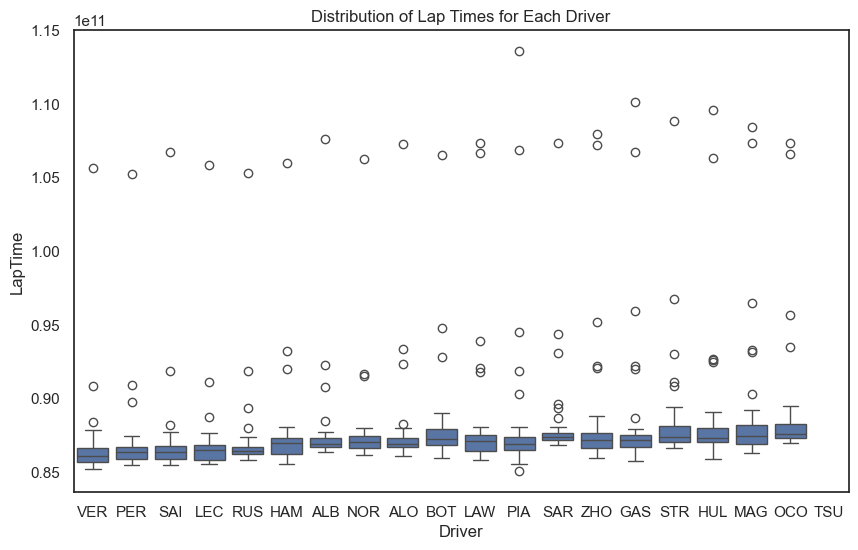

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(laps.sort_values(by='Position_y'), x='Driver', y='LapTime')
plt.gca().invert_yaxis()  # Invert the y-axis
plt.title('Distribution of Lap Times for Each Driver')

In [42]:
temp = laps.groupby('Driver').agg({'MeanLapTime': 'max', 'stdLapTime': 'max', 'Position_y': 'max'}).reset_index()
cleanTemp = temp.dropna(subset=['MeanLapTime', 'stdLapTime'])
# cleanTemp = cleanTemp[cleanTemp.Driver != 'OCO']

corr, p_value = pearsonr(cleanTemp['MeanLapTime'].dt.seconds, cleanTemp['Position_y'])
display(corr)
display(p_value)

corr, p_value = pearsonr(cleanTemp['stdLapTime'].dt.seconds, cleanTemp['Position_y'])
display(corr)
display(p_value)

0.9368094471654881

3.5589834443170797e-09

0.8619643009663165

2.0985408675279163e-06

#### Lap times over time

-0.1295418407743323

6.330333534052088e-05

88.5858327647064

-0.03212457980659015

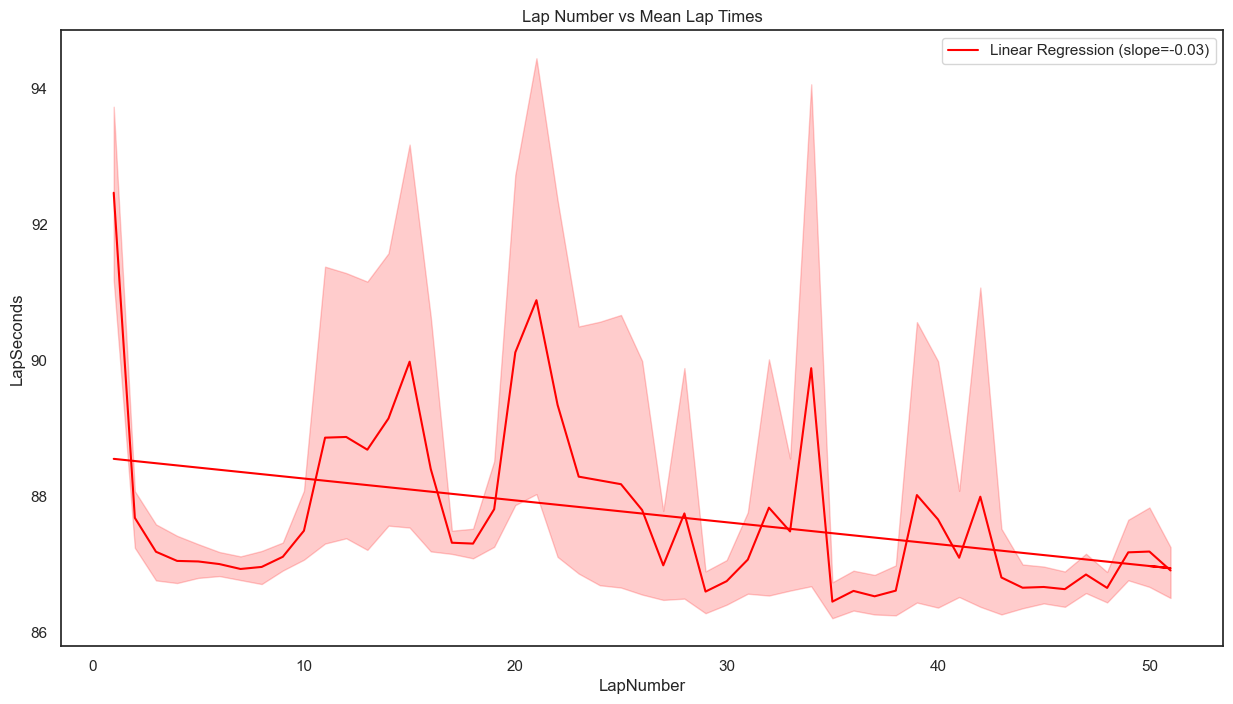

In [43]:
cleanLaps = laps.dropna(subset='LapSeconds')
corr, p_value = pearsonr(cleanLaps['LapNumber'], cleanLaps['LapSeconds'])
display(corr)
display(p_value)
slope, intercept = np.polyfit(cleanLaps['LapNumber'], cleanLaps['LapSeconds'], 1)
display(intercept)
display(slope)
plt.figure(figsize=(15,8))
sns.lineplot(laps, x='LapNumber', y='LapSeconds', color='red')
plt.plot(cleanLaps['LapNumber'], slope * cleanLaps['LapNumber'] + intercept, color='red', label=f'Linear Regression (slope={slope:.2f})')
plt.title('Lap Number vs Mean Lap Times')
plt.legend()
# plt.gca().invert_yaxis()  # Invert the y-axis

-0.25168737446277634

8.39915790870742e-15

87.93103422248885

-0.027219987601986156

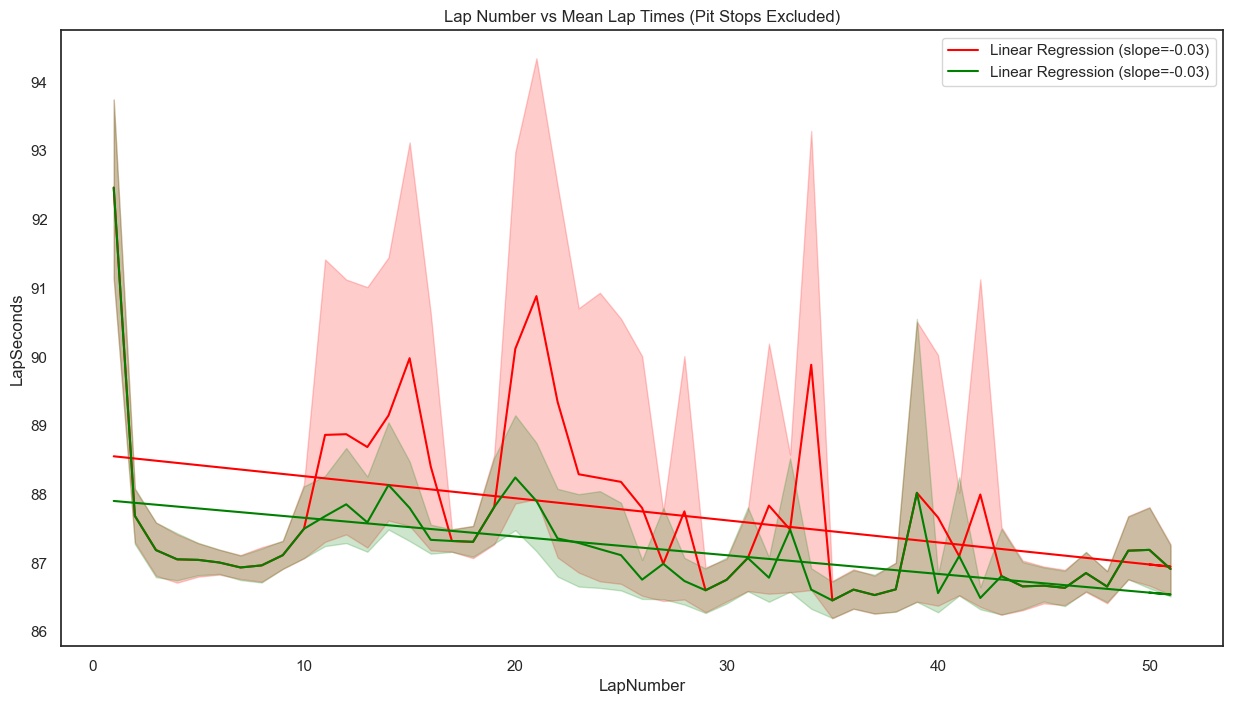

In [44]:
plt.figure(figsize=(15,8))
sns.lineplot(laps, x='LapNumber', y='LapSeconds', color='red')
plt.plot(cleanLaps['LapNumber'], slope * cleanLaps['LapNumber'] + intercept, color='red', label=f'Linear Regression (slope={slope:.2f})')
plt.legend()
# plt.gca().invert_yaxis()  # Invert the y-axis

# cleanLaps = cleanLaps[cleanLaps.LapTime <= cleanLaps.MeanLapTime + 3 * cleanLaps.stdLapTime]
cleanLaps = cleanLaps[cleanLaps.PitOutTime.isna()]
corr, p_value = pearsonr(cleanLaps['LapNumber'], cleanLaps['LapSeconds'])
display(corr)
display(p_value)
slope, intercept = np.polyfit(cleanLaps['LapNumber'], cleanLaps['LapSeconds'], 1)
display(intercept)
display(slope)
# plt.figure(figsize=(15,8))
sns.lineplot(cleanLaps, x='LapNumber', y='LapSeconds', color='green')
plt.plot(cleanLaps['LapNumber'], slope * cleanLaps['LapNumber'] + intercept, color='green', label=f'Linear Regression (slope={slope:.2f})')
plt.title('Lap Number vs Mean Lap Times (Pit Stops Excluded)')

plt.legend()
plt.show()
# plt.gca().invert_yaxis()  # Invert the y-axis

Text(0.5, 1.0, 'Lap Number vs Lap Time')

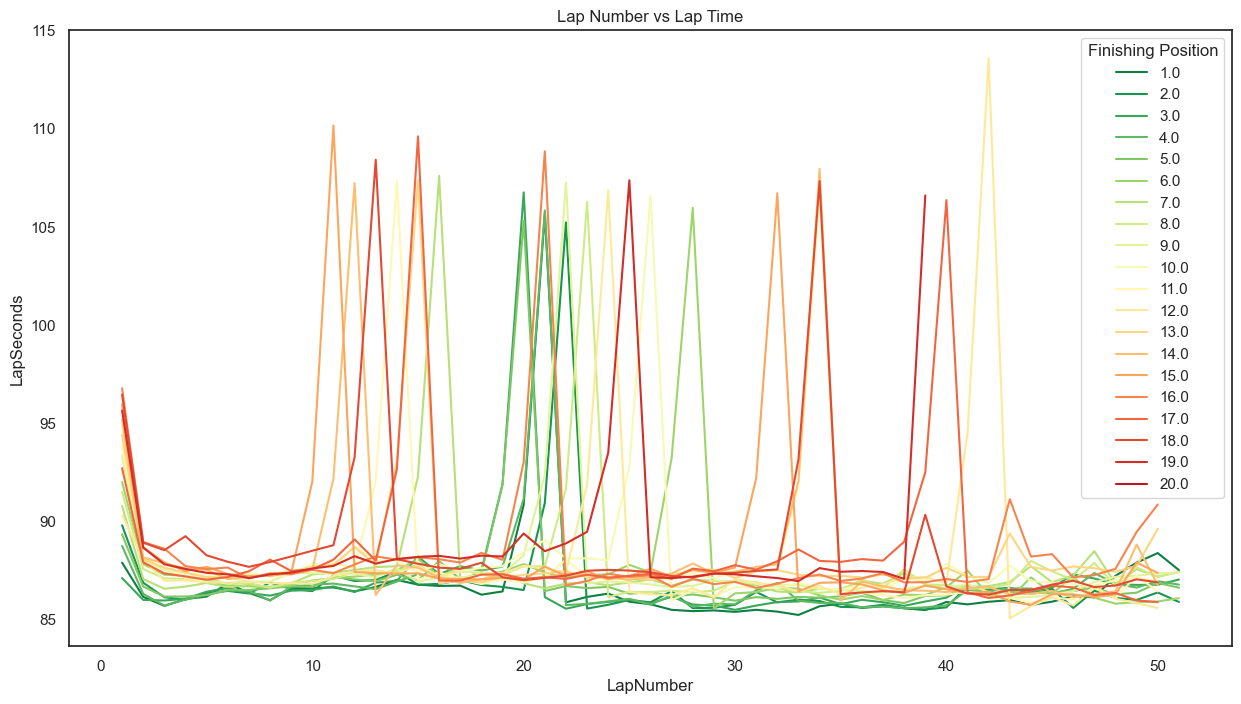

In [45]:
plt.figure(figsize=(15,8))
sns.lineplot(laps, x='LapNumber', y='LapSeconds', hue='Position_y', palette=sns.color_palette("RdYlGn_r", 20), legend='full')
plt.legend(title='Finishing Position')
plt.title('Lap Number vs Lap Time')
# plt.gca().invert_yaxis()  # Invert the y-axis

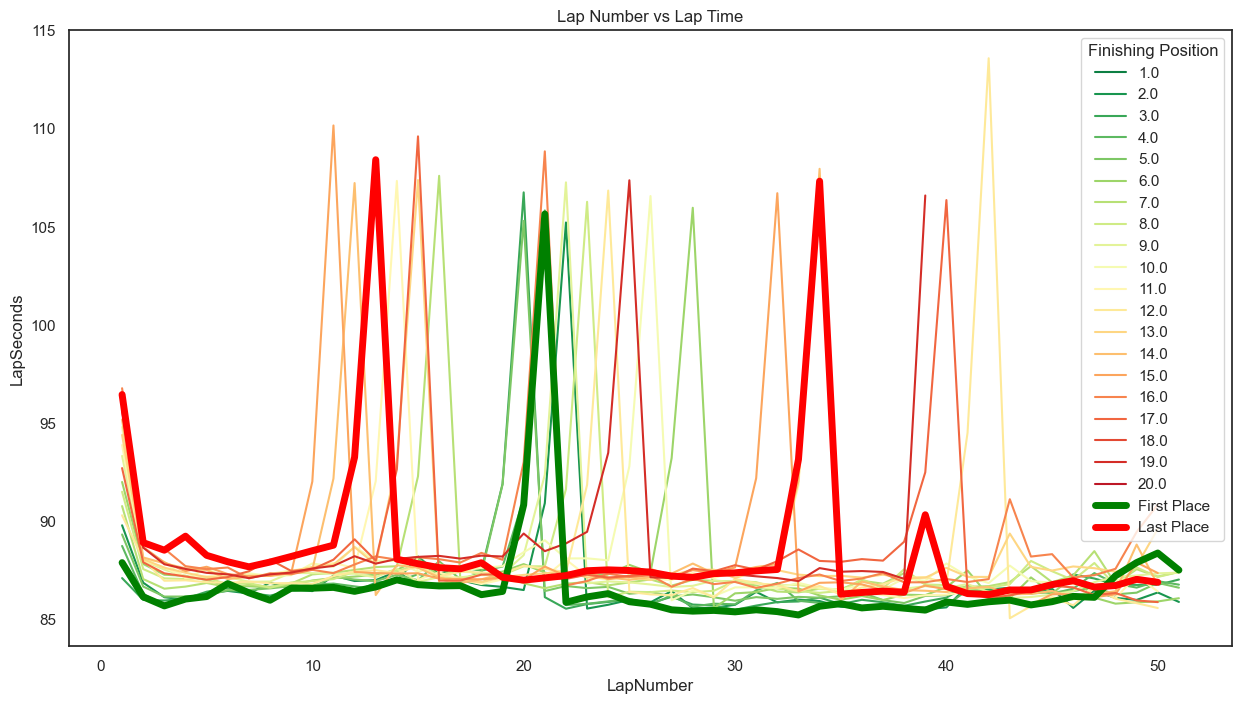

In [46]:
plt.figure(figsize=(15,8))
sns.lineplot(laps, x='LapNumber', y='LapSeconds', hue='Position_y', palette=sns.color_palette("RdYlGn_r", 20), legend='full')
sns.lineplot(data=laps[laps['Position_y'] == 1], x='LapNumber', y='LapSeconds', color='green', linewidth=5, label='First Place')
sns.lineplot(data=laps[laps['Position_y'] == 18], x='LapNumber', y='LapSeconds', color='red', linewidth=5, label='Last Place')
plt.legend(title='Finishing Position')
plt.title('Lap Number vs Lap Time')
plt.show()

# plt.gca().invert_yaxis()  # Invert the y-axis

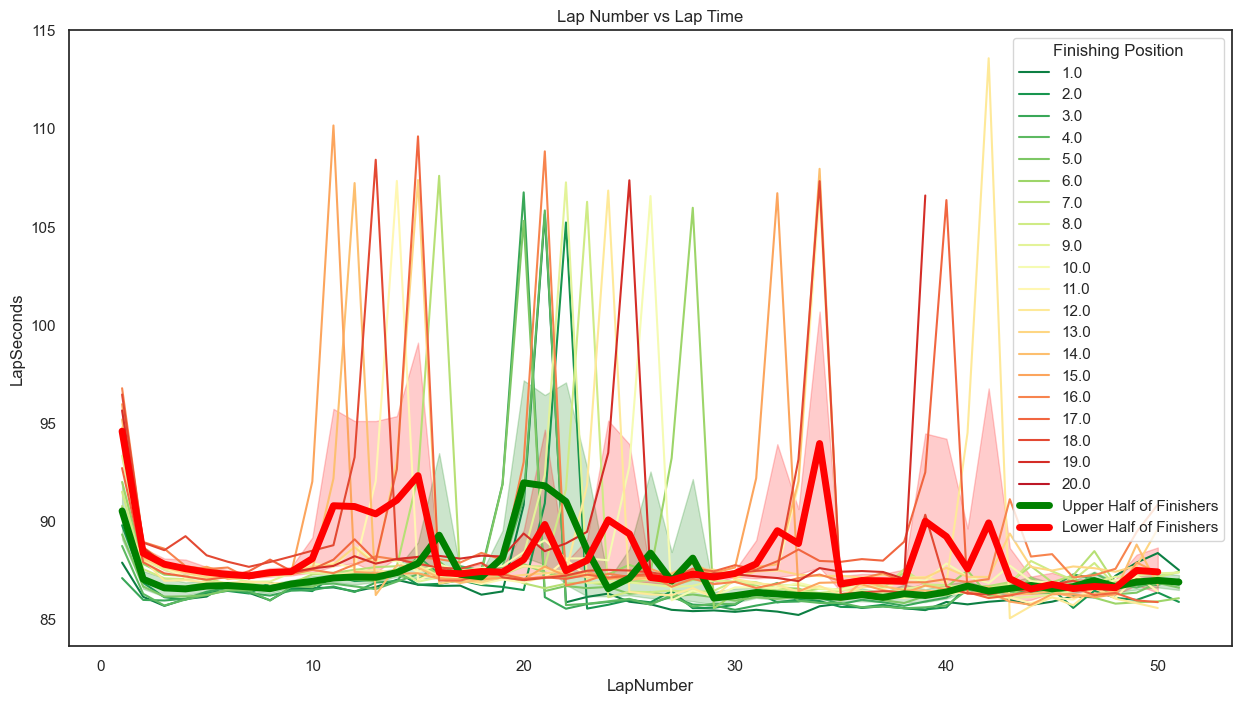

In [47]:
plt.figure(figsize=(15,8))
sns.lineplot(laps, x='LapNumber', y='LapSeconds', hue='Position_y', palette=sns.color_palette("RdYlGn_r", 20), legend='full')
sns.lineplot(data=laps[laps['UpperHalf'] == True], x='LapNumber', y='LapSeconds', color='green', linewidth=5, label='Upper Half of Finishers')
sns.lineplot(data=laps[laps['UpperHalf'] == False], x='LapNumber', y='LapSeconds', color='red', linewidth=5, label='Lower Half of Finishers')
plt.legend(title='Finishing Position')
plt.title('Lap Number vs Lap Time')
plt.show()
# plt.gca().invert_yaxis()  # Invert the y-axis

C:\Users\nated\AppData\Local\Temp\ipykernel_21888\672457105.py:2: UserWarning: The palette list has more values (20) than needed (19), which may not be intended.
  sns.lineplot(laps[laps.PitStops != 0], x='LapNumber', y='LapSeconds', hue='Position_y', palette=sns.color_palette("RdYlGn_r", 20), size='PitStops', legend='full')


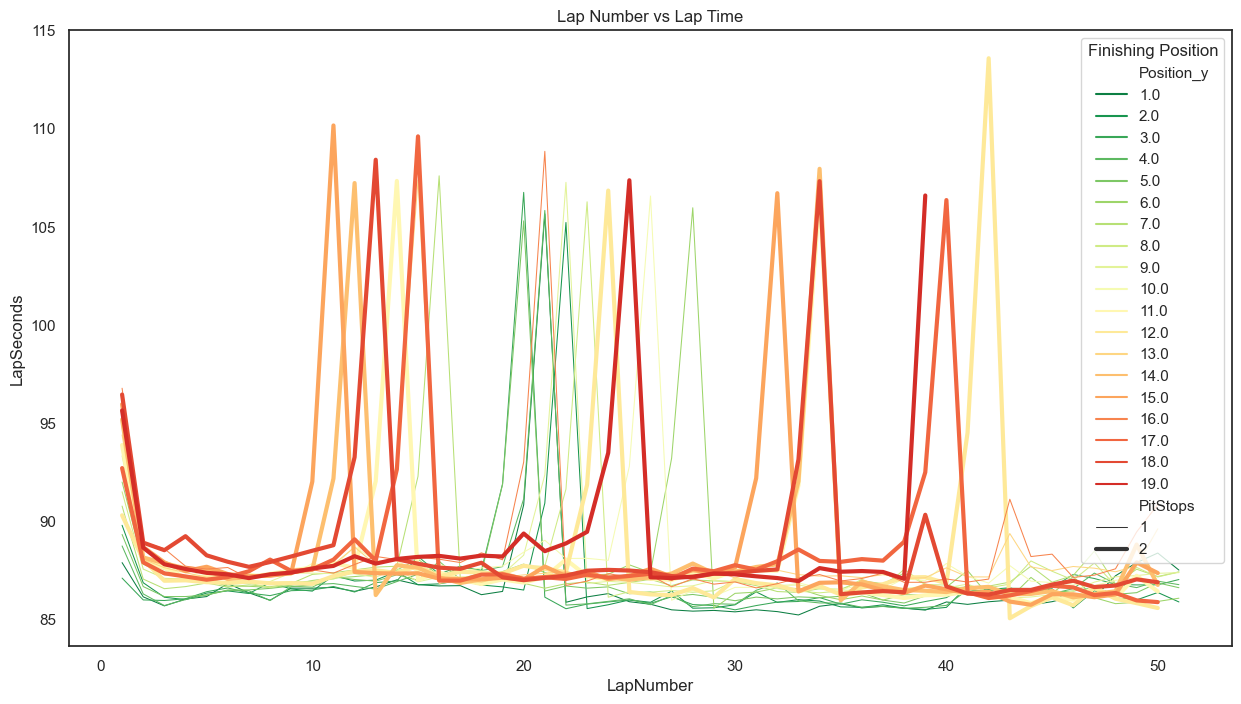

In [48]:
plt.figure(figsize=(15,8))
sns.lineplot(laps[laps.PitStops != 0], x='LapNumber', y='LapSeconds', hue='Position_y', palette=sns.color_palette("RdYlGn_r", 20), size='PitStops', legend='full')
# sns.lineplot(data=laps[laps['UpperHalf'] == True], x='LapNumber', y='LapSeconds', color='green', linewidth=5, label='Upper Half of Finishers')
# sns.lineplot(data=laps[laps['UpperHalf'] == False], x='LapNumber', y='LapSeconds', color='red', linewidth=5, label='Lower Half of Finishers')
plt.legend(title='Finishing Position')
plt.title('Lap Number vs Lap Time')
plt.show()
# plt.gca().invert_yaxis()  # Invert the y-axis

#### Pit stops

Text(0.5, 1.0, 'Pit Stops Taken by Each Driver')

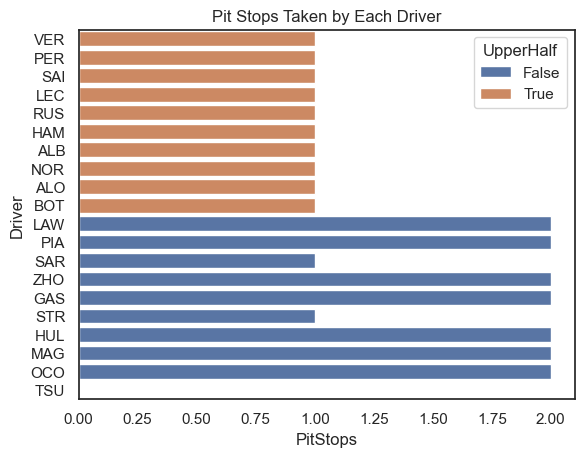

In [49]:
sns.barplot(laps.sort_values(by='Position_y'), x='PitStops', y='Driver', hue='UpperHalf')
plt.title('Pit Stops Taken by Each Driver')

In [50]:
stops = laps.groupby('Driver').agg({'Stop1Time': 'max', 'Stop2Time': 'max', 'avgStopTime': 'max', 'LongestStopTime': 'max', 'Position_y': 'max'}).reset_index()
stops['avgStopTimeSeconds'] = pd.to_timedelta(stops['avgStopTime']).dt.total_seconds()
stops['LongestStopTimeSeconds'] = pd.to_timedelta(stops['LongestStopTime']).dt.total_seconds()

0.40001425003147906

0.08970625363102262

Text(0.5, 1.0, 'Average Pit Stop Length of Each Driver')

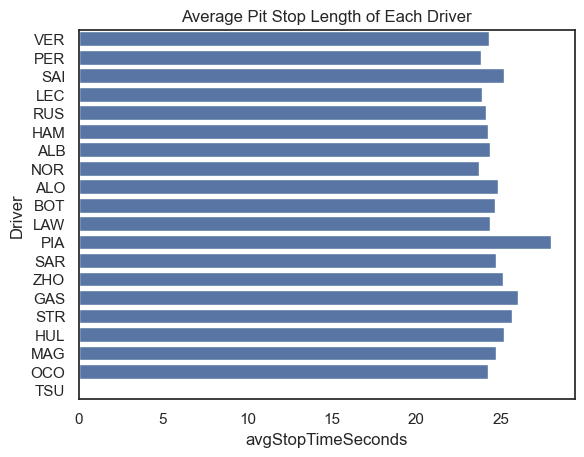

In [51]:
corr, p_value = pearsonr(stops.dropna(subset='avgStopTimeSeconds')['Position_y'], stops.dropna(subset='avgStopTimeSeconds')['avgStopTimeSeconds'])
display(corr)
display(p_value)

sns.barplot(stops.sort_values(by='Position_y'), y='Driver', x='avgStopTimeSeconds')
plt.title('Average Pit Stop Length of Each Driver')

0.3414405195411178

0.15252084129388815

Text(0.5, 1.0, 'Longest Pit Stop Length of Each Driver')

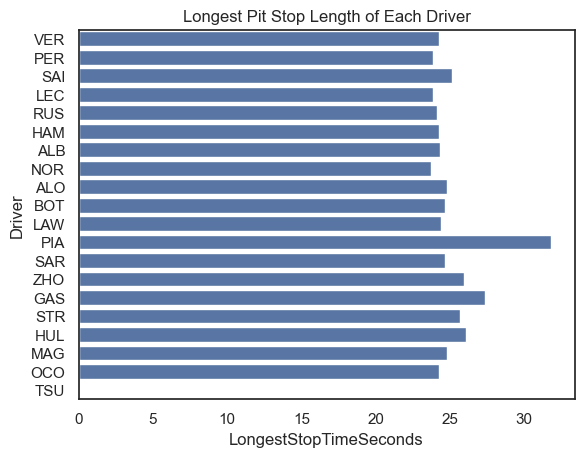

In [52]:
corr, p_value = pearsonr(stops.dropna(subset='LongestStopTimeSeconds')['Position_y'], stops.dropna(subset='LongestStopTimeSeconds')['LongestStopTimeSeconds'])
display(corr)
display(p_value)

sns.barplot(stops.sort_values(by='Position_y'), y='Driver', x='LongestStopTimeSeconds')
plt.title('Longest Pit Stop Length of Each Driver')

#### Tire strategies

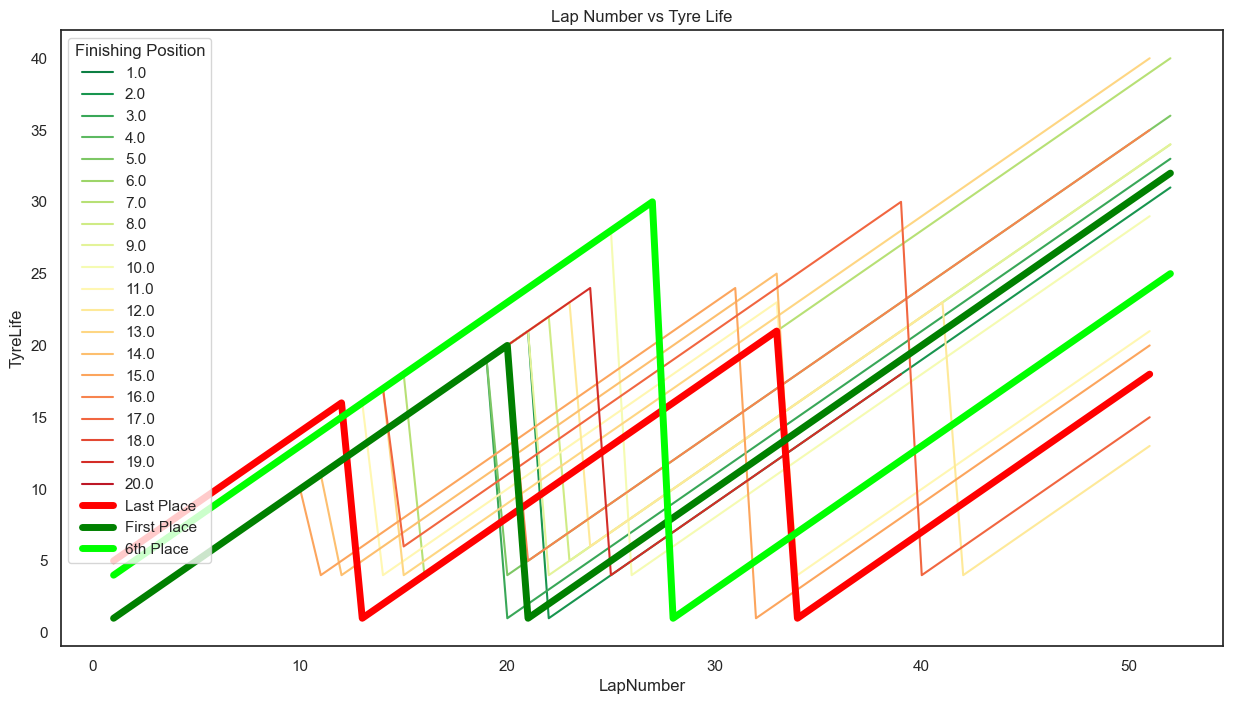

In [53]:
plt.figure(figsize=(15,8))
sns.lineplot(laps, x='LapNumber', y='TyreLife', hue="Position_y", palette=sns.color_palette("RdYlGn_r", 20), legend='full')
sns.lineplot(data=laps[laps['Position_y'] == 18], x='LapNumber', y='TyreLife', color='red', linewidth=5, label='Last Place')
sns.lineplot(data=laps[laps['Position_y'] == 1], x='LapNumber', y='TyreLife', color='green', linewidth=5, label='First Place')
sns.lineplot(data=laps[laps['Position_y'] == 6], x='LapNumber', y='TyreLife', color='lime', linewidth=5, label='6th Place')
plt.legend(title='Finishing Position')
plt.title('Lap Number vs Tyre Life')
plt.show()
# sns.lineplot(laps, x='LapNumber', y='TyreLife')

Text(0.5, 1.0, 'Lap Number vs Tyre Life')

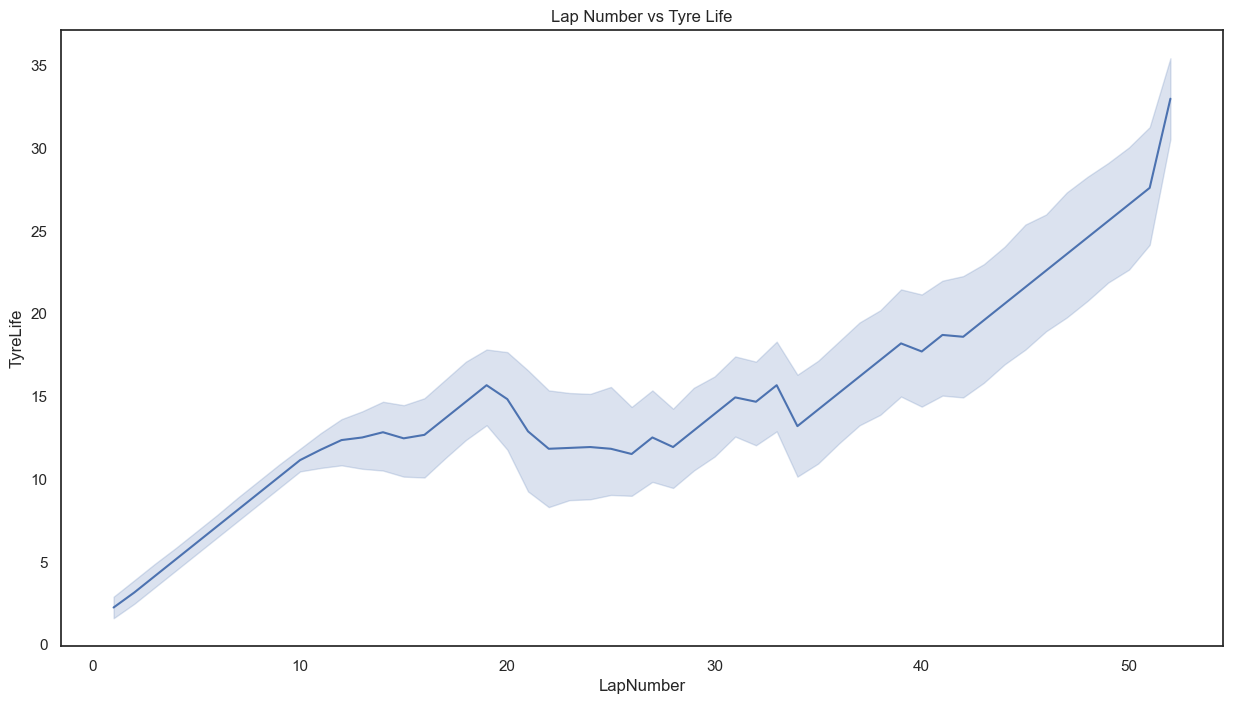

In [54]:
plt.figure(figsize=(15,8))
sns.lineplot(laps, x='LapNumber', y='TyreLife')
plt.title('Lap Number vs Tyre Life')


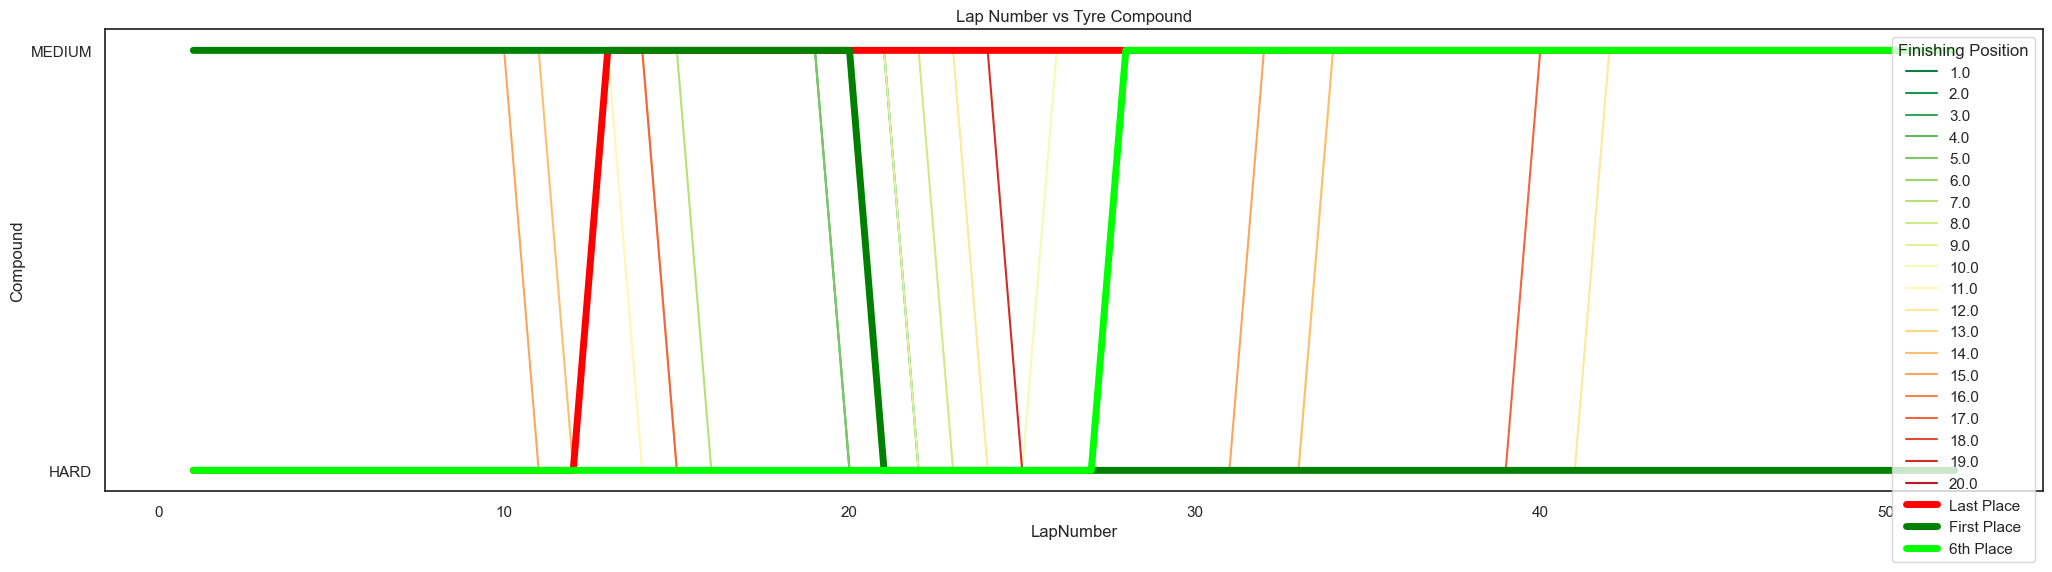

In [55]:
plt.figure(figsize=(25,6))
sns.lineplot(laps, x='LapNumber', y='Compound', hue="Position_y", palette=sns.color_palette("RdYlGn_r", 20), legend='full')
sns.lineplot(data=laps[laps['Position_y'] == 18], x='LapNumber', y='Compound', color='red', linewidth=5, label='Last Place')
sns.lineplot(data=laps[laps['Position_y'] == 1], x='LapNumber', y='Compound', color='green', linewidth=5, label='First Place')
sns.lineplot(data=laps[laps['Position_y'] == 6], x='LapNumber', y='Compound', color='lime', linewidth=5, label='6th Place')
plt.legend(title='Finishing Position')
plt.title('Lap Number vs Tyre Compound')
plt.show()

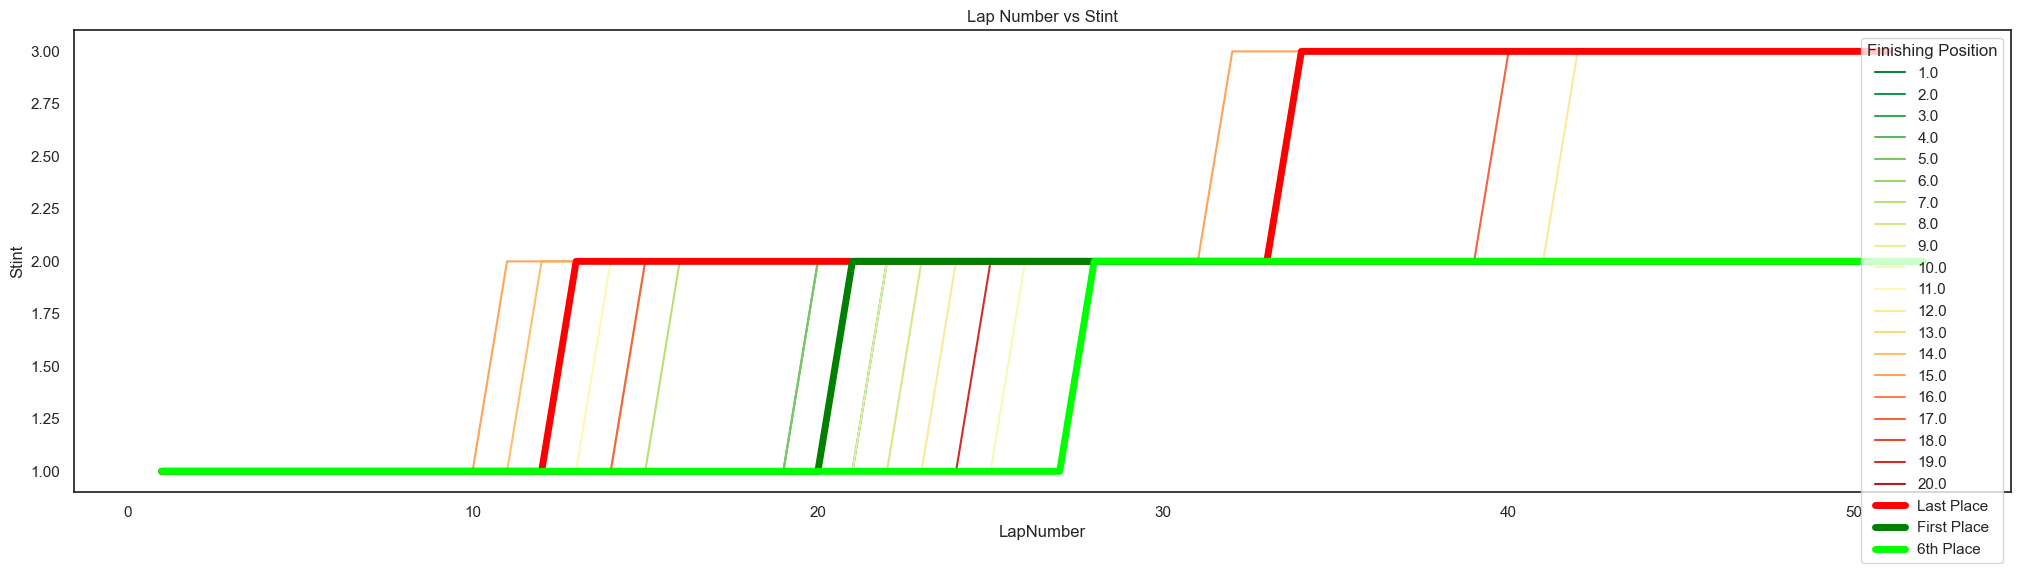

In [56]:
plt.figure(figsize=(25,6))
sns.lineplot(laps, x='LapNumber', y='Stint', hue="Position_y", palette=sns.color_palette("RdYlGn_r", 20), legend='full')
sns.lineplot(data=laps[laps['Position_y'] == 18], x='LapNumber', y='Stint', color='red', linewidth=5, label='Last Place')
sns.lineplot(data=laps[laps['Position_y'] == 1], x='LapNumber', y='Stint', color='green', linewidth=5, label='First Place')
sns.lineplot(data=laps[laps['Position_y'] == 6], x='LapNumber', y='Stint', color='lime', linewidth=5, label='6th Place')
plt.legend(title='Finishing Position')
plt.title('Lap Number vs Stint')
plt.show()

In [57]:
# laps[not laps.PitOutTime.isna() or not laps.PitOutTime.isna()]
# laps.loc[(laps['PitInTime'].notnull()) | (laps['PitOutTime'].notnull())]

### Driver-specific data

In [58]:
laps[laps.IsAccurate == False]
# laps.IsAccurate.unique()

Time Driver DriverNumber                LapTime  \
0   0 days 01:23:49.801000    VER            1 0 days 00:01:27.905000   
19  0 days 01:51:16.867000    VER            1 0 days 00:01:30.849000   
20  0 days 01:53:02.527000    VER            1 0 days 00:01:45.660000   
51  0 days 02:39:24.909000    VER            1                    NaT   
52  0 days 01:23:57.870000    GAS           10 0 days 00:01:35.974000   
..                     ...    ...          ...                    ...   
938 0 days 01:55:56.821000    PIA           81 0 days 00:01:31.866000   
939 0 days 01:57:43.675000    PIA           81 0 days 00:01:46.854000   
956 0 days 02:22:24.613000    PIA           81 0 days 00:01:34.520000   
957 0 days 02:24:18.206000    PIA           81 0 days 00:01:53.593000   
966 0 days 02:39:15.549000    PIA           81                    NaT   

     LapNumber  Stint             PitOutTime              PitInTime  \
0          1.0    1.0                    NaT                    NaT   
19        20.0    1.0                    NaT 0 days 01:51:13.003000   
20        21.0    2.0 0 days 01:51:37.284000                    NaT   
51        52.0    2.0                    NaT                    NaT   
52         1.0    1.0                    NaT                    NaT   
..         ...    ...                    ...                    ...   
938       23.0    1.0                    NaT 0 days 01:55:52.969000   
939       24.0    2.0 0 days 01:56:17.109000                    NaT   
956       41.0    2.0                    NaT 0 days 02:22:20.779000   
957       42.0    3.0 0 days 02:22:52.576000                    NaT   
966       51.0    3.0                    NaT                    NaT   

               Sector1Time            Sector2Time  ... UpperHalf PitStops  \
0                      NaT 0 days 00:00:29.666000  ...      True        1   
19  0 days 00:00:28.384000 0 days 00:00:29.907000  ...      True        1   
20  0 days 00:00:48.054000 0 days 00:00:29.398000  ...      True        1   
51                     NaT                    NaT  ...      True        1   
52                     NaT 0 days 00:00:32.313000  ...     False        2   
..                     ...                    ...  ...       ...      ...   
938 0 days 00:00:28.658000 0 days 00:00:30.224000  ...     False        2   
939 0 days 00:00:48.308000 0 days 00:00:29.993000  ...     False        2   
956 0 days 00:00:28.371000 0 days 00:00:32.446000  ...     False        2   
957 0 days 00:00:56.224000 0 days 00:00:29.325000  ...     False        2   
966                    NaT                    NaT  ...     False        2   

                  MeanLapTime                stdLapTime  \
0   0 days 00:01:26.689078431 0 days 00:00:02.870592843   
19  0 days 00:01:26.689078431 0 days 00:00:02.870592843   
20  0 days 00:01:26.689078431 0 days 00:00:02.870592843   
51  0 days 00:01:26.689078431 0 days 00:00:02.870592843   
52     0 days 00:01:28.296720 0 days 00:00:04.494925506   
..                        ...                       ...   
938    0 days 00:01:28.061160 0 days 00:00:04.857096181   
939    0 days 00:01:28.061160 0 days 00:00:04.857096181   
956    0 days 00:01:28.061160 0 days 00:00:04.857096181   
957    0 days 00:01:28.061160 0 days 00:00:04.857096181   
966    0 days 00:01:28.061160 0 days 00:00:04.857096181   

                  Stop1Time  Stop1Lap               Stop2Time  Stop2Lap  \
0    0 days 00:00:24.281000      20.0                     NaT       NaN   
19   0 days 00:00:24.281000      20.0                     NaT       NaN   
20   0 days 00:00:24.281000      20.0                     NaT       NaN   
51   0 days 00:00:24.281000      20.0                     NaT       NaN   
52   0 days 00:00:27.375000      10.0  0 days 00:00:24.672000      31.0   
..                      ...       ...                     ...       ...   
938  0 days 00:00:24.140000      23.0  0 days 00:00:31.797000      41.0   
939  0 days 00:00:24.140000      23.0  0 days 00:00:31.797

In [59]:
laps.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position_x', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'LapSeconds', 'LapStartTimeSeconds',
       'Abbreviation_x', 'Position_y', 'GridPosition', 'TotalTime',
       'Abbreviation_y', 'Q1', 'Q2', 'Q3', 'UpperHalf', 'PitStops',
       'MeanLapTime', 'stdLapTime', 'Stop1Time', 'Stop1Lap', 'Stop2Time',
       'Stop2Lap', 'avgStopTime', 'LongestStopTime'],
      dtype='object')

In [60]:
def computeMode(x):
    return x.mode().iloc[0] if not x.mode().empty else None

drivers = laps.groupby('Driver').agg({
    'LapTime': ['mean', 'min', 'max', 'std'], 
    'Stint': 'max', 
    'PitInTime': ['max', 'min'],
    'Sector1Time': ['mean', 'min', 'max'], 
    'Sector2Time': ['mean', 'min', 'max'], 
    'Sector3Time': ['mean', 'min', 'max'], 
    'SpeedI1': ['mean', 'min', 'max'],
    'SpeedI2': ['mean', 'min', 'max'],
    'SpeedFL': ['mean', 'min', 'max'],
    'SpeedST': ['mean', 'min', 'max'],
    'Compound': [computeMode, 'first', 'last'], 
    'TyreLife': ['mean', 'min', 'max'],
    'Position_x': ['first', 'mean', 'std', 'min', 'max', computeMode], 
    'LapSeconds': ['mean', 'min', 'max'],
    'Position_y': 'max', 
    'GridPosition': 'max',
    'TotalTime': 'max',
    'Q1': 'max',
    'Q2': 'max',
    'Q3': 'max',
    'UpperHalf': 'first',
    'PitStops': 'max', 
    'MeanLapTime': 'max',
    'stdLapTime': 'max', 
    'Stop1Time': 'max',
    'Stop2Time': 'max',
    'Stop1Lap': 'max',
    'Stop2Lap': 'max',
    'avgStopTime': 'max',
    'LongestStopTime': 'max',
}).reset_index()

drivers[['Compound', 'Stint']]['Compound']['computeMode']
drivers

Driver                   LapTime                         \
                               mean                    min   
0     ALB 0 days 00:01:27.573509803 0 days 00:01:26.389000   
1     ALO 0 days 00:01:27.596803921 0 days 00:01:26.105000   
2     BOT    0 days 00:01:27.962500 0 days 00:01:25.988000   
3     GAS    0 days 00:01:28.296720 0 days 00:01:25.758000   
4     HAM 0 days 00:01:27.427882352 0 days 00:01:25.582000   
5     HUL    0 days 00:01:28.464720 0 days 00:01:25.894000   
6     LAW    0 days 00:01:28.098580 0 days 00:01:25.842000   
7     LEC 0 days 00:01:26.912156862 0 days 00:01:25.580000   
8     MAG    0 days 00:01:28.675340 0 days 00:01:26.278000   
9     NOR 0 days 00:01:27.580235294 0 days 00:01:26.144000   
10    OCO 0 days 00:01:29.101974358 0 days 00:01:26.963000   
11    PER 0 days 00:01:26.807980392 0 days 00:01:25.522000   
12    PIA    0 days 00:01:28.061160 0 days 00:01:25.072000   
13    RUS 0 days 00:01:27.042568627 0 days 00:01:25.847000   
14    SAI 0 days 00:01:26.908549019 0 days 00:01:25.501000   
15    SAR    0 days 00:01:28.124980 0 days 00:01:26.840000   
16    STR    0 days 00:01:28.354960 0 days 00:01:26.617000   
17    TSU                       NaT                    NaT   
18    VER 0 days 00:01:26.689078431 0 days 00:01:25.240000   
19    ZHO    0 days 00:01:28.278120 0 days 00:01:25.983000   

                                                    Stint  \
                      max                       std   max   
0  0 days 00:01:47.605000 0 days 00:00:03.026367528   2.0   
1  0 days 00:01:47.272000 0 days 00:00:03.069690434   2.0   
2  0 days 00:01:46.575000 0 days 00:00:03.053030466   2.0   
3  0 days 00:01:50.170000 0 days 00:00:04.494925506   3.0   
4  0 days 00:01:45.978000 0 days 00:00:02.949988377   2.0   
5  0 days 00:01:49.615000 0 days 00:00:04.292109942   3.0   
6  0 days 00:01:47.344000 0 days 00:00:04.174965296   3.0   
7  0 days 00:01:45.842000 0 days 00:00:02.859335785   2.0   
8  0 days 00:01:48.424000 0 days 00:00:04.381879186   3.0   
9  0 days 00:01:46.282000 0 days 00:00:02.853382565   2.0   
10 0 days 00:01:47.378000 0 days 00:00:04.528567418   2.0   
11 0 days 00:01:45.228000 0 days 00:00:02.796890112   2.0   
12 0 days 00:01:53.593000 0 days 00:00:04.857096181   3.0   
13 0 days 00:01:45.310000 0 days 00:00:02.770904323   2.0   
14 0 days 00:01:46.762000 0 days 00:00:02.997324061   2.0   
15 0 days 00:01:47.389000 0 days 00:00:03.091688644   2.0   
16 0 days 00:01:48.851000 0 days 00:00:03.436205928   2.0   
17                    NaT                       NaT   1.0   
18 0 days 00:01:45.660000 0 days 00:00:02.870592843   2.0   
19 0 days 00:01:47.962000 0 days 00:00:04.292825736   3.0   

                PitInTime                                      Sector1Time  \
                      max                    min                      mean   
0  0 days 01:44:13.149000 0 days 01:44:13.149000    0 days 00:00:28.667020   
1  0 days 01:53:02.971000 0 days 01:53:02.971000    0 days 00:00:28.582360   
2  0 days 01:59:05.467000 0 days 01:59:05.467000    0 days 00:00:28.669000   
3  0 days 02:08:08.289000 0 days 01:37:06.997000 0 days 00:00:29.169836734   
4  0 days 02:01:45.387000 0 days 02:01:45.387000    0 days 00:00:28.640500   
5  0 days 02:19:51.890000 0 days 01:42:55.868000 0 days 00:00:29.315591836   
6  0 days 02:10:55.631000 0 days 01:41:26.463000 0 days 00:00:28.987612244   
7  0 days 01:51:19.066000 0 days 01:51:19.066000    0 days 00:00:28.529820   
8  0 days 02:11:15.162000 0 days 01:40:11.901000 0 days 00:00:29.354816326   
9  0 days 01:54:26.173000 0 days 01:54:26.173000    0 days 00:00:28.742760   
10 0 days 02:20:13.093000 0 days 01:57:44.608000 0 days 00:00:29.044289473   
11 0 days 01:52:46.112000 0 days 01:52:46.112000    0 days 00:00:28.629440   
12 0 days 02:22:20.779000 0 days 01:55:52.969000 0 days 00:00:29.314857142   
13 0 days 01:49:55.551000 0 days 01:49:55.551000    0 days 00:00:28.634840   
14 0 days 01:49:51.504000 0 days 01:49:51.50400

In [61]:
def convert_values(val):
    if isinstance(val, pd.Timedelta):
        return val.total_seconds()
    elif pd.isna(val) or val == pd.NaT:
        return np.nan
    else:
        return val

# Apply the function to the entire DataFrame
driversSeconds = drivers.applymap(convert_values)

driversSeconds

C:\Users\nated\AppData\Local\Temp\ipykernel_21888\4215228504.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  driversSeconds = drivers.applymap(convert_values)


Driver    LapTime                            Stint PitInTime            \
                mean     min      max       std   max       max       min   
0     ALB  87.573509  86.389  107.605  3.026367   2.0  6253.149  6253.149   
1     ALO  87.596803  86.105  107.272  3.069690   2.0  6782.971  6782.971   
2     BOT  87.962500  85.988  106.575  3.053030   2.0  7145.467  7145.467   
3     GAS  88.296720  85.758  110.170  4.494925   3.0  7688.289  5826.997   
4     HAM  87.427882  85.582  105.978  2.949988   2.0  7305.387  7305.387   
5     HUL  88.464720  85.894  109.615  4.292109   3.0  8391.890  6175.868   
6     LAW  88.098580  85.842  107.344  4.174965   3.0  7855.631  6086.463   
7     LEC  86.912156  85.580  105.842  2.859335   2.0  6679.066  6679.066   
8     MAG  88.675340  86.278  108.424  4.381879   3.0  7875.162  6011.901   
9     NOR  87.580235  86.144  106.282  2.853382   2.0  6866.173  6866.173   
10    OCO  89.101974  86.963  107.378  4.528567   2.0  8413.093  7064.608   
11    PER  86.807980  85.522  105.228  2.796890   2.0  6766.112  6766.112   
12    PIA  88.061160  85.072  113.593  4.857096   3.0  8540.779  6952.969   
13    RUS  87.042568  85.847  105.310  2.770904   2.0  6595.551  6595.551   
14    SAI  86.908549  85.501  106.762  2.997324   2.0  6591.504  6591.504   
15    SAR  88.124980  86.840  107.389  3.091688   2.0  6176.978  6176.978   
16    STR  88.354960  86.617  108.851  3.436205   2.0  6709.784  6709.784   
17    TSU        NaN     NaN      NaN       NaN   1.0       NaN       NaN   
18    VER  86.689078  85.240  105.660  2.870592   2.0  6673.003  6673.003   
19    ZHO  88.278120  85.983  107.962  4.292825   3.0  7858.209  5913.106   

   Sector1Time          ... UpperHalf PitStops MeanLapTime stdLapTime  \
          mean     min  ...     first      max         max        max   
0    28.667020  28.009  ...      True        1   87.573509   3.026367   
1    28.582360  27.812  ...      True        1   87.596803   3.069690   
2    28.669000  28.023  ...      True        1   87.962500   3.053030   
3    29.169836  27.984  ...     False        2   88.296720   4.494925   
4    28.640500  27.731  ...      True        1   87.427882   2.949988   
5    29.315591  28.215  ...     False        2   88.464720   4.292109   
6    28.987612  27.782  ...     False        2   88.098580   4.174965   
7    28.529820  27.902  ...      True        1   86.912156   2.859335   
8    29.354816  28.156  ...     False        2   88.675340   4.381879   
9    28.742760  28.037  ...      True        1   87.580235   2.853382   
10   29.044289  28.190  ...     False        2   89.101974   4.528567   
11   28.629440  27.825  ...      True        1   86.807980   2.796890   
12   29.314857  27.763  ...     False        2   88.061160   4.857096   
13   28.634840  28.056  ...      True        1   87.042568   2.770904   
14   28.655160  27.936  ...      True        1   86.908549   2.997324   
15   28.728020  27.934  ...     False        1   88.124980   3.091688   
16   28.693020  27.963  ...     False        1   88.354960   3.436205   
17         NaN     NaN  ...     False        0         NaN        NaN   
18   28.598700  28.010  ...      True        1   86.689078   2.870592   
19   29.079836  27.755  ...     False        2   88.278120   4.292825   

   Stop1Time Stop2Time Stop1Lap Stop2Lap avgStopTime LongestStopTime  
         max       max      max      max         max             max  
0     24.343       NaN     15.0      NaN     24.3430          24.343  
1     24.828       NaN     21.0      NaN     24.8280          24.828  
2     24.656       NaN     25.0      NaN     24.6560          24.656  
3     27.375    24.672     10.0     31.0     26.0235          27.375  
4     24.234       NaN     27.0      NaN     24.2340          24.234  
5     26.078    24.328     14.0     39.0     25.2030          26.078  
6     24.406    24.281     13.0     33.0     24.3435          24.406  
7     23.890       NaN     20.0      NaN     23.8900          

In [62]:
# driversSeconds = driversSeconds[['LapTime', 'Stint', 'PitInTime', 'Sector1Time', 'Position_y']]
# driversSeconds.columns = [
#     'LapTimeMean',
#     'LapTimeMin',
#     'LapTimeMax',
#     'LapTimestd',
#     'Stints',
#     'PitInTimeMax',
#     'PitInTimeMin',
#     'Sector1TimeMean',
#     'Sector1TimeMin',
#     'Sector1TimeMax',
#     'FinalPosition'
# ]


In [63]:
numeric_columns = driversSeconds.select_dtypes(include=['number']).columns
numeric_df = driversSeconds[numeric_columns]
numeric_df = numeric_df[[col for col in numeric_df.columns if col != ('Position_y', 'max')] + [('Position_y', 'max')]]
numeric_df = numeric_df[[col for col in numeric_df.columns if col != ('TotalTime', 'max')] + [('TotalTime', 'max')]]
statsCorr = abs(numeric_df.corr())
# statsCorr = numeric_df.corr()

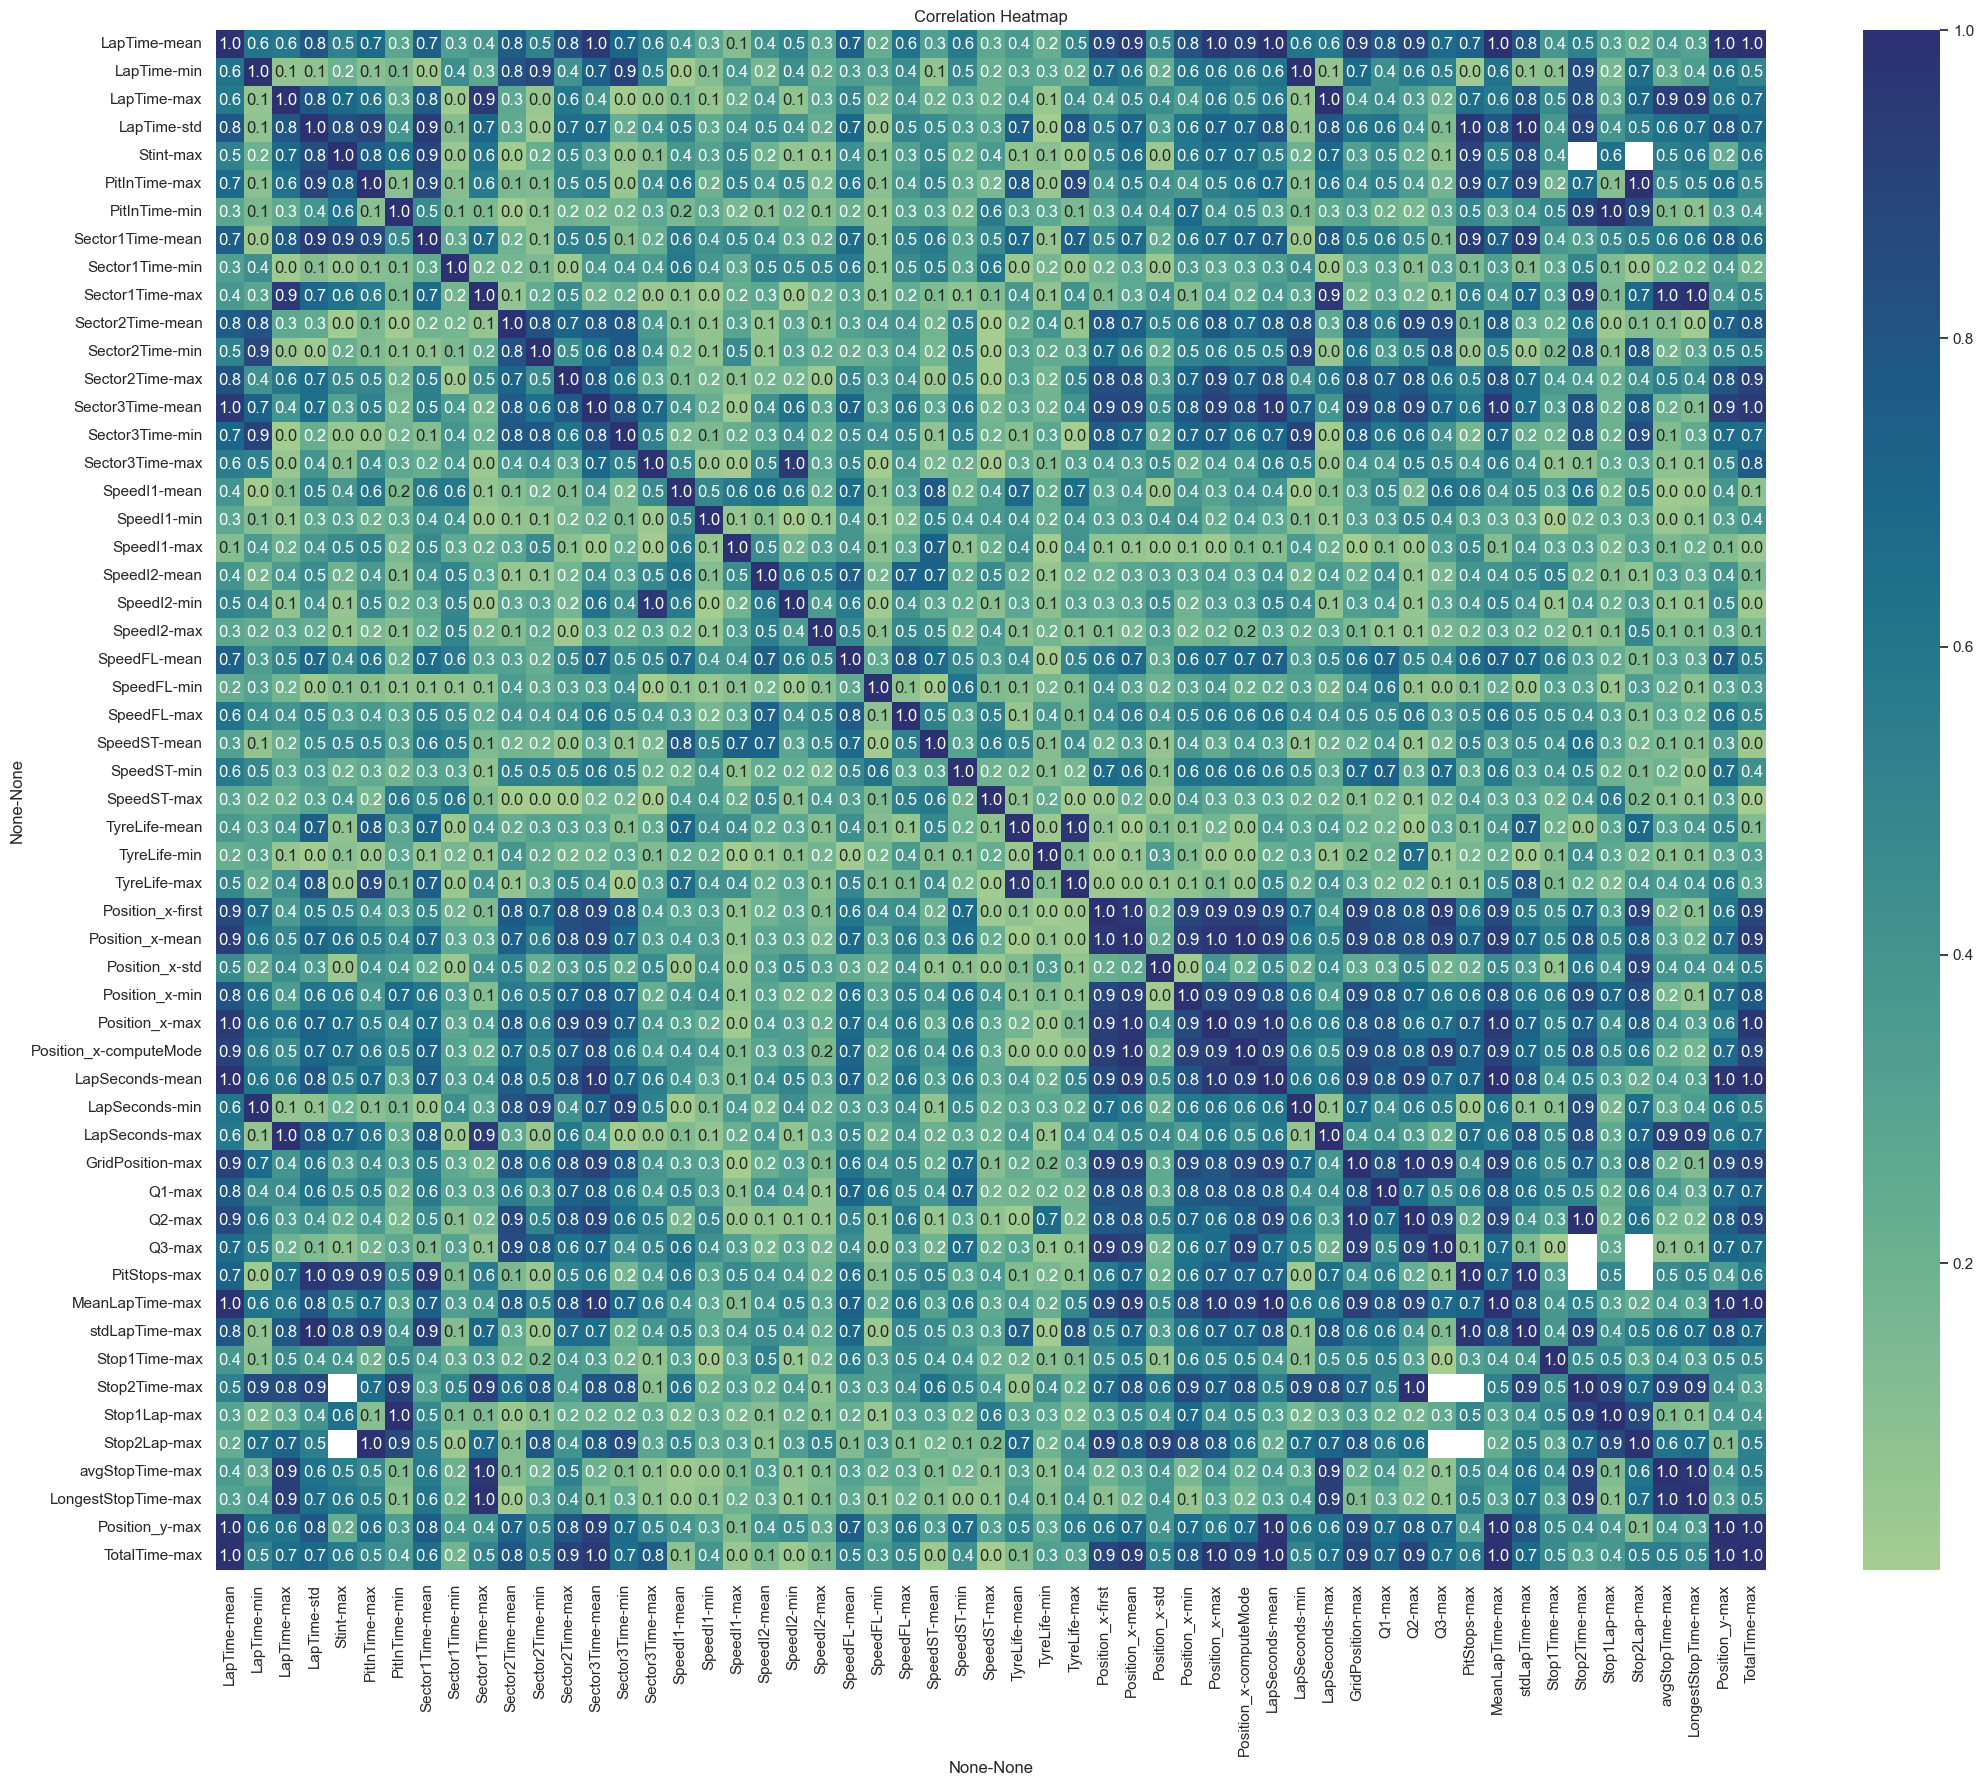

In [64]:
plt.figure(figsize=(25, 20))  # Adjust the figure size as needed
sns.heatmap(statsCorr, annot=True, cmap='crest', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

In [65]:
# driversSeconds = driversSeconds.dropna(subset=[('LapTime', 'mean')])
# driversSeconds = driversSeconds.dropna(subset=[('TotalTime', 'max')])
# display(driversSeconds)
# corr, p_value = pearsonr(driversSeconds['LapTime']['mean'], driversSeconds['TotalTime']['max'])
# display(corr)
# display(p_value)

Text(0, 0.5, 'Finishing Time')

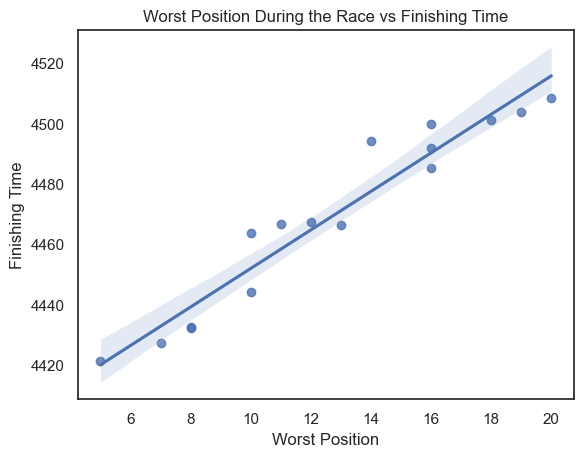

In [66]:
sns.regplot(x=driversSeconds[('Position_x', 'max')], y=driversSeconds[('TotalTime', 'max')])
plt.title('Worst Position During the Race vs Finishing Time')
plt.xlabel('Worst Position')
plt.ylabel('Finishing Time')

Text(0, 0.5, 'Finishing Time')

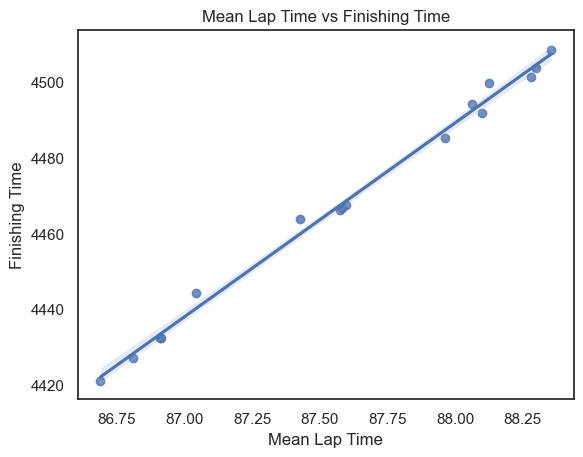

In [67]:
# corr, p_value = pearsonr(driversSeconds[('LapTime', 'mean')], driversSeconds[('TotalTime', 'max')])
# display(corr)
# display(p_value)

sns.regplot(x=driversSeconds[('LapTime', 'mean')], y=driversSeconds[('TotalTime', 'max')])
plt.title('Mean Lap Time vs Finishing Time')
plt.xlabel('Mean Lap Time')
plt.ylabel('Finishing Time')

Text(0, 0.5, 'Finishing Time')

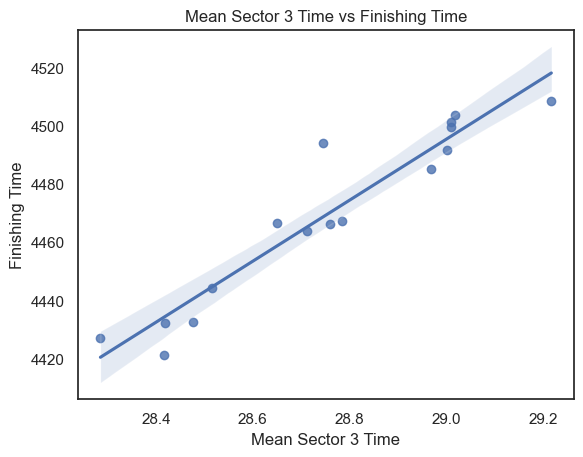

In [68]:
sns.regplot(x=driversSeconds[('Sector3Time', 'mean')], y=driversSeconds[('TotalTime', 'max')])
plt.title('Mean Sector 3 Time vs Finishing Time')
plt.xlabel('Mean Sector 3 Time')
plt.ylabel('Finishing Time')

Text(0, 0.5, 'Finishing Time')

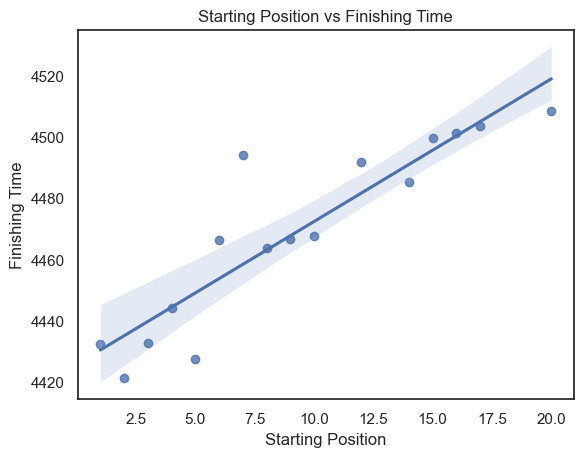

In [69]:
sns.regplot(x=driversSeconds[('GridPosition', 'max')], y=driversSeconds[('TotalTime', 'max')])
plt.title('Starting Position vs Finishing Time')
plt.xlabel('Starting Position')
plt.ylabel('Finishing Time')

In [74]:
# feature_cols = [('Stint', 'max'), ('GridPosition', 'max'), ('SpeedI1', 'mean'), ('SpeedI2', 'mean'), ('SpeedFL', 'mean'), ('SpeedST', 'mean'), ('TyreLife', 'mean'), ('Q1', 'max'), ('PitStops', 'max'), ('stdLapTime', 'max'), ('avgStopTime', 'max')]
feature_cols = [('Stint', 'max'), ('GridPosition', 'max'), ('TyreLife', 'mean'), ('Q1', 'max'), ('PitStops', 'max'), ('stdLapTime', 'max'), ('avgStopTime', 'max')]
numeric_df = numeric_df.dropna(subset=[('TotalTime', 'max')])
crossValidations = 500
avgRSquared = 0
for _ in range(crossValidations):
        # X = numeric_df.drop([('TotalTime', 'max'), ('Position_y', 'max')], axis=1).dropna(axis=1)
        X = numeric_df[feature_cols]
        y = numeric_df[('TotalTime', 'max')]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

        lm = LinearRegression()
        lm.fit(X_train, y_train)
        
        avgRSquared += lm.score(X_test, y_test)
avgRSquared /= crossValidations
avgRSquared

0.5895649082283326